In [2]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [3]:
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/archive.zip
/content/.config/gce
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/configurations/config_default
/content/.config/logs/2023.11.10/14.21.45.226269.log
/content/.config/logs/2023.11.10/14.21.27.107551.log
/content/.config/logs/2023.11.10/14.21.55.880036.log
/content/.config/logs/2023.11.10/14.21.00.219512.log
/content/.config/logs/2023.11.10/14.21.55.112077.log
/content/.config/logs/2023.11.10/14.21.36.717411.log
/content/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Alternaria/Alternaria_138.jpg
/content/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Alternaria/Alternaria_157.jpg
/content/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Alternaria/Alternaria_041.jpg
/content/MangoFruitDDS/SenMangoFruitDDS_bgremoved/Alternaria/Alternaria_076.jpg
/content/MangoFruitDDS/SenMangoFruitDDS_bgremove

In [4]:
import os
a_dir = '/content/MangoFruitDDS/SenMangoFruitDDS_original/Alternaria'
b_dir = '/content/MangoFruitDDS/SenMangoFruitDDS_original/Anthracnose'
c_dir = '/content/MangoFruitDDS/SenMangoFruitDDS_original/Black Mould Rot'
d_dir = '/content/MangoFruitDDS/SenMangoFruitDDS_original/Healthy'
e_dir = '/content/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot'

In [5]:
a_names = os.listdir('/content/MangoFruitDDS/SenMangoFruitDDS_original/Alternaria')
print(a_names[:10])
b_names = os.listdir('/content/MangoFruitDDS/SenMangoFruitDDS_original/Anthracnose')
print(b_names[:10])
c_names = os.listdir('/content/MangoFruitDDS/SenMangoFruitDDS_original/Black Mould Rot')
print(c_names[:10])
d_names = os.listdir('/content/MangoFruitDDS/SenMangoFruitDDS_original/Healthy')
print(d_names[:10])
e_names = os.listdir('/content/MangoFruitDDS/SenMangoFruitDDS_original/Stem end Rot')
print(e_names[:10])

['alternaria_015.jpg', 'alternaria_150.jpg', 'alternaria_127.jpg', 'alternaria_103.jpg', 'alternaria_090.jpg', 'alternaria_112.jpg', 'alternaria_087.jpg', 'alternaria_072.jpg', 'alternaria_052.jpg', 'alternaria_035.jpg']
['anthracnose_048.jpg', 'anthracnose_104.jpg', 'anthracnose_071.jpg', 'anthracnose_003.jpg', 'anthracnose_124.jpg', 'anthracnose_082.jpg', 'anthracnose_081.jpg', 'anthracnose_042.jpg', 'anthracnose_108.jpg', 'anthracnose_010.jpg']
['aspergillus_011.jpg', 'aspergillus_133.jpg', 'aspergillus_104.jpg', 'aspergillus_036.jpg', 'aspergillus_021.jpg', 'aspergillus_094.jpg', 'aspergillus_146.jpg', 'aspergillus_031.jpg', 'aspergillus_022.jpg', 'aspergillus_040.jpg']
['healthy_064.jpg', 'healthy_070.jpg', 'healthy_118.jpg', 'healthy_157.jpg', 'healthy_023.jpg', 'healthy_094.jpg', 'healthy_096.jpg', 'healthy_111.jpg', 'healthy_083.jpg', 'healthy_183.jpg']
['lasio_038.jpg', 'lasio_079.jpg', 'lasio_120.jpg', 'lasio_132.jpg', 'lasio_108.jpg', 'lasio_082.jpg', 'lasio_055.jpg', 'lasio

In [6]:
print('total Alternaria images:', len(os.listdir(a_dir)))
print('total Anthracnose images:', len(os.listdir(b_dir)))
print('total Black Mould Rot images:', len(os.listdir(c_dir)))
print('total Healthy images:', len(os.listdir(d_dir)))
print('total Stem end Rot images:', len(os.listdir(e_dir)))

total Alternaria images: 170
total Anthracnose images: 132
total Black Mould Rot images: 186
total Healthy images: 208
total Stem end Rot images: 166


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 10
ncols = 4
pic_index = 0

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
a_pix = [os.path.join(a_dir, fname)
                for fname in a_names[pic_index-8:pic_index]]
b_pix = [os.path.join(b_dir, fname)
                for fname in b_names[pic_index-8:pic_index]]
c_pix = [os.path.join(c_dir, fname)
                for fname in c_names[pic_index-8:pic_index]]
d_pix = [os.path.join(d_dir, fname)
                for fname in d_names[pic_index-8:pic_index]]
e_pix = [os.path.join(e_dir, fname)
                for fname in e_names[pic_index-8:pic_index]]
for i, img_path in enumerate(a_pix + b_pix + c_pix + d_pix + e_pix):
  sp = plt.subplot(nrows, ncols, (i % (nrows * ncols)) + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
from sklearn.model_selection import train_test_split
data_dir = '/content/MangoFruitDDS/SenMangoFruitDDS_original'
batch_size = 64
epochs = 30
input_shape = (300, 300, 3)
image_paths = []
labels = []
for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    if os.path.isdir(category_dir):
        for image_filename in os.listdir(category_dir):
            if image_filename.endswith('.jpg'):
                image_path = os.path.join(category_dir, image_filename)
                image_paths.append(image_path)
                labels.append(category)
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=0.2, random_state=42)


In [10]:
len(train_image_paths),len(test_image_paths), len(train_labels), len(test_labels)

(689, 173, 689, 173)

In [11]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [14]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': train_image_paths, 'label': train_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_dataframe(
    pd.DataFrame({'image_path': test_image_paths, 'label': test_labels}),
    x_col='image_path',
    y_col='label',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

Found 689 validated image filenames belonging to 5 classes.
Found 173 validated image filenames belonging to 5 classes.


In [15]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=8, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/30
8/8 [==============================] - 49s 6s/step - loss: 1.6827 - accuracy: 0.2374 - val_loss: 1.6303 - val_accuracy: 0.2543
Epoch 2/30
8/8 [==============================] - 45s 6s/step - loss: 1.5920 - accuracy: 0.2354 - val_loss: 1.5802 - val_accuracy: 0.3121
Epoch 3/30
8/8 [==============================] - 52s 6s/step - loss: 1.5850 - accuracy: 0.2441 - val_loss: 1.6037 - val_accuracy: 0.1965
Epoch 4/30
8/8 [==============================] - 52s 7s/step - loss: 1.5705 - accuracy: 0.2736 - val_loss: 1.5892 - val_accuracy: 0.2139
Epoch 5/30
8/8 [==============================] - 50s 6s/step - loss: 1.5738 - accuracy: 0.2736 - val_loss: 1.4700 - val_accuracy: 0.4393
Epoch 6/30
8/8 [==============================] - 56s 7s/step - loss: 1.5555 - accuracy: 0.3038 - val_loss: 1.4755 - val_accuracy: 0.3988
Epoch 7/30
8/8 [==============================] - 48s 6s/step - loss: 1.4220 - accuracy: 0.3903 - val_loss: 1.4697 - val_accuracy: 0.3757
Epoch 8/30
8/8 [==================

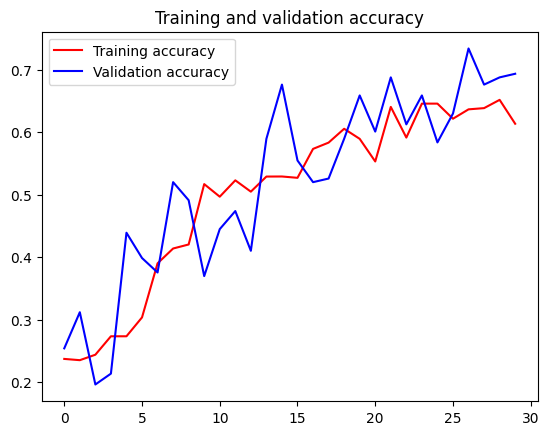

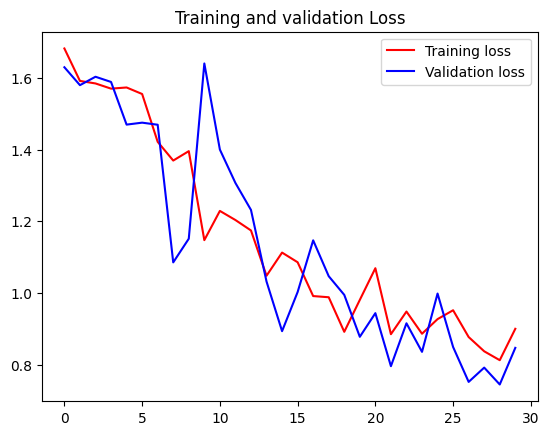

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, f1_score
dataset_dir = '/content/'
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
batch_size = 32
train_generator = datagen.flow_from_directory(dataset_dir, target_size=(224, 224), batch_size=batch_size, subset='training')
valid_generator = datagen.flow_from_directory(dataset_dir, target_size=(224, 224), batch_size=batch_size, subset='validation')
num_classes = len(train_generator.class_indices)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=valid_generator)
predictions = model.predict(valid_generator)
y_true = valid_generator.classes
y_pred = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Found 1360 images belonging to 3 classes.
Found 340 images belonging to 3 classes.
Epoch 1/10
43/43 [==============================] - 93s 2s/step - loss: 0.0271 - accuracy: 0.9779 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
43/43 [==============================] - 92s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
43/43 [==============================] - 98s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
43/43 [==============================] - 92s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
43/43 [==============================] - 99s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
43/43 [==============================] - 92s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
43/43 [===============

In [18]:
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color
import numpy as np
import os
root_dir = '/content/MangoFruitDDS/SenMangoFruitDDS_original'
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
def calculate_texture_features(image):
    if image.shape[2] == 4:
        image = color.rgba2rgb(image)
    gray_image = color.rgb2gray(image)
    gray_image_uint = (gray_image * 255).astype(np.uint8)
    glcm = greycomatrix(gray_image_uint, distances=distances, angles=angles, symmetric=True, normed=True)
    contrast = np.mean(greycoprops(glcm, 'contrast'))
    dissimilarity = np.mean(greycoprops(glcm, 'dissimilarity'))
    homogeneity = np.mean(greycoprops(glcm, 'homogeneity'))
    energy = np.mean(greycoprops(glcm, 'energy'))
    correlation = np.mean(greycoprops(glcm, 'correlation'))
    asm = np.mean(greycoprops(glcm, 'ASM'))
    return contrast, dissimilarity, homogeneity, energy, correlation, asm
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        print(f"Processing images in folder: {folder}")
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(folder_path, filename)
                image = io.imread(image_path)
                texture_features = calculate_texture_features(image)
                print(f"Texture features for {filename}: {texture_features}")

Processing images in folder: Alternaria
Texture features for alternaria_015.jpg: (126.68693683095633, 6.326917735577623, 0.24073771468343078, 0.028444411138057592, 0.951707891691861, 0.0008161910504332455)
Texture features for alternaria_150.jpg: (468.28542162614366, 8.388403582095759, 0.28210959306493305, 0.03125400995042951, 0.8456058538176, 0.000987892682023011)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_127.jpg: (94.97059442539647, 4.823898149246752, 0.29845944169492294, 0.02924177336953118, 0.9705989468999294, 0.0008687023700936847)
Texture features for alternaria_103.jpg: (172.7183400222501, 5.396135027474318, 0.31482347013975004, 0.03425567923439015, 0.9199993220060726, 0.0011955572401081479)
Texture features for alternaria_090.jpg: (395.6936767858577, 7.311756576597555, 0.2727931971977356, 0.025380105047500906, 0.9217877640954182, 0.000654704970300368)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_112.jpg: (232.44049741278528, 7.3243078120108684, 0.2383498351704478, 0.02031787489998309, 0.9383682814789006, 0.00041853543275742564)
Texture features for alternaria_087.jpg: (28.12749555975334, 2.966497451102238, 0.3610696260047305, 0.03923685197807537, 0.982159456188532, 0.0015716414387923706)
Texture features for alternaria_072.jpg: (204.21600559478165, 7.375190020788299, 0.2252000445942118, 0.020302943820178637, 0.939196065131044, 0.0004181529215245309)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_052.jpg: (179.77709098475623, 6.924590982313256, 0.23364687363917114, 0.02239588823371928, 0.9176901384845902, 0.0005107151035824115)
Texture features for alternaria_035.jpg: (87.54895573093235, 5.656794215983574, 0.22878554053737252, 0.01911418530050356, 0.9807884761830327, 0.00037260911900408527)
Texture features for alternaria_019.jpg: (77.03871049947908, 4.394180343708994, 0.3140948531284719, 0.028405708079859964, 0.9805257252315611, 0.0008231822815589648)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_023.jpg: (149.60520050173506, 5.530562522378502, 0.3052520765046904, 0.02576055727092311, 0.9601719689320524, 0.0006747350884404171)
Texture features for alternaria_060.jpg: (75.48847263708127, 4.312819769811, 0.33290535858433884, 0.028582013009228132, 0.9663642948974777, 0.0008319362720301831)
Texture features for alternaria_167.jpg: (209.59912888094837, 6.338051435630003, 0.2585839981532985, 0.020424734373825443, 0.9540599107548178, 0.0004231157017961015)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_034.jpg: (99.32124477605231, 5.346387989831161, 0.2632261925390374, 0.02612312042631017, 0.9467994004124664, 0.0006935282788984451)
Texture features for alternaria_095.jpg: (256.80095606281867, 6.560660147935927, 0.32777053627437563, 0.028642184524538192, 0.9481346531546277, 0.0008359185601701462)
Texture features for alternaria_141.jpg: (64.25859524212586, 4.2574318849696215, 0.3105650911217958, 0.026277397185169058, 0.9864982494288169, 0.0007041038120258392)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_080.jpg: (56.69839612607917, 4.3203815606747265, 0.29163597201781005, 0.025036210256625235, 0.9857438179731582, 0.0006365115515597111)
Texture features for alternaria_061.jpg: (302.0829794754054, 6.603906538858561, 0.3960262280425971, 0.22199585066632554, 0.9626919248384883, 0.04931500491930596)
Texture features for alternaria_067.jpg: (230.34638905219356, 6.467273034926332, 0.26721375313328116, 0.025729042833772555, 0.9258445802308719, 0.0006716384632230865)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_027.jpg: (170.33533549060144, 6.888165615400982, 0.22970982384103047, 0.021678408212561433, 0.9205774158027125, 0.00047679541593756316)
Texture features for alternaria_031.jpg: (278.76168836597276, 7.276484252946879, 0.2548849296281495, 0.023627550677436476, 0.8845832241330877, 0.0005649512179459761)
Texture features for alternaria_065.jpg: (92.1943092451041, 4.52877360289101, 0.32767821768637867, 0.042347021956808166, 0.9483152454076356, 0.001825230922282957)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_048.jpg: (87.0797371330187, 4.099134679877246, 0.3379487521634816, 0.03193190241373111, 0.9860817609321958, 0.001040136305392609)
Texture features for alternaria_004.jpg: (212.88880329858048, 8.572071226793048, 0.192812037827607, 0.019179858085937074, 0.9427633075582156, 0.00037204240163960287)
Texture features for alternaria_109.jpg: (156.05010944471385, 6.407169568414268, 0.2441286316542923, 0.021291229550579136, 0.9632877878754792, 0.00046143401567882324)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_102.jpg: (270.19368055478486, 6.943488732187446, 0.2790144104040574, 0.025889978797621175, 0.9202436076449597, 0.0006793430974121516)
Texture features for alternaria_130.jpg: (153.52045675157524, 5.890810640542543, 0.28495735933052657, 0.02401769876168267, 0.9497379035235775, 0.0005862246428009471)
Texture features for alternaria_145.jpg: (54.173161961123874, 4.399288014133452, 0.27211858859399346, 0.021773145750200992, 0.9898638301587135, 0.00048203440526758045)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_082.jpg: (115.29372038638178, 4.867152247504939, 0.3365147179080012, 0.04032361441900518, 0.9444990731878665, 0.0016493126099381727)
Texture features for alternaria_075.jpg: (114.91764926214029, 5.8600401292781745, 0.23000706279350544, 0.025924297548221564, 0.9260623714965829, 0.000678734646313541)
Texture features for alternaria_098.jpg: (144.75601845560885, 5.627594350654136, 0.28758935890127363, 0.023723726744946813, 0.9513504332518711, 0.0005708775314475796)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_118.jpg: (76.77301779743091, 4.676644797090925, 0.28966232020441474, 0.025042772702221893, 0.9789797627489963, 0.0006366930190949986)
Texture features for alternaria_133.jpg: (48.904186810495105, 3.719952919407564, 0.32671208202889673, 0.03457231692386598, 0.9726070806934102, 0.0012195898665658524)
Texture features for alternaria_077.jpg: (162.11867054670486, 5.405451002589177, 0.3104288649491117, 0.023762943978197212, 0.9706402186626333, 0.0005756658357401769)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_088.jpg: (91.42662421084263, 4.191772690634178, 0.3502595012761696, 0.038178737531658784, 0.9651057435291821, 0.0014845410899021613)
Texture features for alternaria_079.jpg: (248.88343008498975, 7.917710099534098, 0.21652669329701957, 0.016738962556280608, 0.955242167986529, 0.0002842462995132496)
Texture features for alternaria_016.jpg: (222.26605666782908, 6.992570570966194, 0.296682852343598, 0.028043850672233996, 0.9555791257107588, 0.0007967205831388531)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_064.jpg: (296.58695636462596, 8.564209292565684, 0.20262630236932658, 0.02104529399299929, 0.916530373066477, 0.00044937251547368123)
Texture features for alternaria_091.jpg: (167.02496514219524, 6.70291663614361, 0.22284920228392238, 0.020676611828483373, 0.9569992331787686, 0.00043428678830499207)
Texture features for alternaria_021.jpg: (101.72859822288154, 4.449086110462557, 0.33971870213890903, 0.03542923681103082, 0.8986668212749745, 0.0012797156598667945)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_050.jpg: (340.99912806732505, 11.209518104917153, 0.16812048286572123, 0.018836283756584898, 0.8975175298636423, 0.00035728857840875783)
Texture features for alternaria_152.jpg: (588.0601699610457, 9.608429170583848, 0.26482089712053813, 0.02446359209377499, 0.8336052790269001, 0.0006062280240551699)
Texture features for alternaria_008.jpg: (318.7998731723336, 8.760020657018883, 0.22011299923192573, 0.022475307090724386, 0.9317512694210427, 0.0005128106335114868)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_003.jpg: (280.0128511096649, 6.919276660253395, 0.29135264309873077, 0.02450625744124137, 0.9310633828370057, 0.000609214853539399)
Texture features for alternaria_013.jpg: (129.40665437128396, 6.230533117308409, 0.234805610675647, 0.021132297762362372, 0.9560174257958448, 0.0004511997145248858)
Texture features for alternaria_125.jpg: (61.63007604612856, 3.705634293019246, 0.3486911366643483, 0.04172138779444303, 0.9713509221754807, 0.0017670677925887082)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_033.jpg: (252.83978036573035, 8.213894776044652, 0.20260273176808827, 0.021600458773699902, 0.9279713947548567, 0.000470277596729448)
Texture features for alternaria_043.jpg: (246.2433154921963, 7.850928064129362, 0.23362096919396844, 0.02182215031871162, 0.9622851241074083, 0.00048272490514360793)
Texture features for alternaria_163.jpg: (125.1408291566935, 4.904686917994626, 0.3330896535154951, 0.027509604009477526, 0.9657135693068684, 0.0007722768711347677)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_081.jpg: (88.79533794123142, 5.086121424640023, 0.25955208548442826, 0.02437617160788677, 0.9631111629992982, 0.0006030875052785038)
Texture features for alternaria_020.jpg: (116.75545469479397, 5.744884722635445, 0.2759688631997986, 0.024864970894683234, 0.9721632839579678, 0.0006269353097677798)
Texture features for alternaria_138.jpg: (185.57496086732772, 7.4361749817812965, 0.23682215446715804, 0.020672393430775236, 0.9634265406445316, 0.0004326910753685305)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_037.jpg: (205.0992549430351, 5.4048378144219456, 0.3043131066694906, 0.025286799769495202, 0.9684819312590092, 0.0006501622087169444)
Texture features for alternaria_047.jpg: (496.3413170427228, 10.536240101659981, 0.20809142615703013, 0.018702448112341362, 0.8742649083327897, 0.0003550592316163565)
Texture features for alternaria_086.jpg: (227.33704567146864, 2.937015218115939, 0.750683136186844, 0.5835978033861834, 0.9761427855589342, 0.34061025916909654)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_042.jpg: (109.571534161795, 5.860995085430287, 0.238564856660065, 0.024786368166884606, 0.971544780168892, 0.0006234765235640356)
Texture features for alternaria_106.jpg: (69.99866262148005, 3.8106762704755686, 0.34757693164586073, 0.03689905396626995, 0.973217437126773, 0.001386454344967496)
Texture features for alternaria_135.jpg: (121.63440797685739, 5.779651668575945, 0.27344609513172635, 0.028508357039053425, 0.9541010781159667, 0.0008251889156492609)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_056.jpg: (70.35928489879093, 4.90474574717613, 0.25497948362472855, 0.026878371896218264, 0.9557950399875811, 0.0007314994264422979)
Texture features for alternaria_030.jpg: (300.21941775652675, 7.958999082351977, 0.23956297362490944, 0.021895589930443226, 0.890071360678616, 0.00048611234167110436)
Texture features for alternaria_073.jpg: (179.28667385808137, 5.890745104916301, 0.3180081316498094, 0.02908913926383774, 0.9481164043063446, 0.0008588075002875995)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_038.jpg: (235.1900880099664, 6.129011041494324, 0.3100102022309327, 0.03188614365973514, 0.9513888954669144, 0.0010315373542524346)
Texture features for alternaria_066.jpg: (119.06059892560309, 4.782424773857062, 0.34044348394792046, 0.03251198656565876, 0.9377166274481114, 0.0010726865129063396)
Texture features for alternaria_158.jpg: (145.39138317674266, 5.55124024799714, 0.3184803920786614, 0.0371413308858354, 0.9422869030437119, 0.001398212347045985)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_012.jpg: (172.74870554488754, 7.527842621939842, 0.21289155631901402, 0.020256565310482578, 0.9386613002578951, 0.0004158481694363739)
Texture features for alternaria_007.jpg: (643.804857400124, 9.70034418823001, 0.26186044166270406, 0.023542248287691414, 0.8861706614152217, 0.0005624521565039809)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_074.jpg: (457.6555468212634, 8.323621323970242, 0.28257195370299343, 0.025704894970196592, 0.9099224118081004, 0.0006718762334278023)
Texture features for alternaria_129.jpg: (57.06593653622951, 3.235398240094453, 0.4146952681198368, 0.03667506907556141, 0.976389735336152, 0.0013740867716634504)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_049.jpg: (331.9449897571117, 8.285668081034627, 0.22414970134718318, 0.021057167507444602, 0.9251275801995072, 0.00044959130615054654)
Texture features for alternaria_068.jpg: (165.8632238506274, 6.617150396577166, 0.2540852744106366, 0.03300651691929158, 0.8946141627231016, 0.0011015700291305932)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_124.jpg: (101.9409185935843, 4.610478083961564, 0.29083360689379095, 0.02800283600692104, 0.9593766855116731, 0.0007950744512160011)
Texture features for alternaria_040.jpg: (139.20653938672191, 5.378852749947203, 0.36271900358947695, 0.0381159368819402, 0.9534435607414581, 0.0014762395421488632)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_006.jpg: (257.53084517511564, 7.6103751641722965, 0.22375831091761603, 0.02310251011625754, 0.9042224615037543, 0.0005396706431013155)
Texture features for alternaria_154.jpg: (76.28873653215919, 4.929975084318587, 0.27098153461912117, 0.028581967835065822, 0.9386738747620611, 0.0008283960415674308)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_144.jpg: (205.0260783997933, 5.990226495488808, 0.27980369309713665, 0.02901333021672706, 0.9316654968574474, 0.0008524760824494653)
Texture features for alternaria_122.jpg: (52.478040594448515, 3.3258211147946604, 0.36662028955452114, 0.042740886024658455, 0.9378932760273777, 0.001854117011533218)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_069.jpg: (96.83127970508274, 4.603222483021104, 0.308702360075167, 0.03165019026321015, 0.9631035555158677, 0.0010137218812701994)
Texture features for alternaria_057.jpg: (60.8609384533518, 3.7010474900317494, 0.3738753198620715, 0.03629853553332925, 0.9711929002259403, 0.0013440377327231109)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_140.jpg: (116.15573909500229, 4.590392602243482, 0.37869977058145854, 0.03270804872323698, 0.9362702619376889, 0.0010906327038473088)
Texture features for alternaria_116.jpg: (170.28311422679388, 6.442594028367741, 0.23396794204993845, 0.01763634841387077, 0.9753197696926558, 0.00031618158857120595)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_113.jpg: (128.8336172293701, 5.141757131480271, 0.3257300760687473, 0.02697632424340111, 0.9791799605162685, 0.0007405463075205978)
Texture features for alternaria_155.jpg: (89.86015453477536, 5.3114467373700185, 0.27112347735353354, 0.021953141275955917, 0.9844728278938996, 0.0004938856456094544)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_058.jpg: (136.73065245961158, 5.268618746650297, 0.361897560189364, 0.03667208819257655, 0.9572328632631272, 0.001364802160146318)
Texture features for alternaria_142.jpg: (192.52848750337316, 7.721838870833338, 0.2045125218095708, 0.018720741376703088, 0.9482465841857005, 0.0003542234190808835)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_104.jpg: (227.97149188485727, 7.182091018714723, 0.23293131942940878, 0.027607367346153946, 0.8061570742364171, 0.0007719268605687425)
Texture features for alternaria_153.jpg: (237.30735549324785, 6.6022018221823275, 0.2729545814448918, 0.021321310500978897, 0.9605157732093225, 0.0004622608015072982)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_092.jpg: (66.87054881570806, 3.5759544479161693, 0.373440992690377, 0.04084107426036412, 0.953844922082169, 0.0016960597869985336)
Texture features for alternaria_166.jpg: (80.29303333952376, 4.3745258326625285, 0.3167641662319739, 0.024556084067151873, 0.9759558265654551, 0.0006120399770924741)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_054.jpg: (455.467104478606, 6.987063650060629, 0.3427846930786415, 0.11113416672217076, 0.9570459960325599, 0.012368293146210858)
Texture features for alternaria_132.jpg: (199.5435833532912, 3.6734697147569406, 0.5980166875540244, 0.36967396413508347, 0.9729285878900593, 0.1367044437785833)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_170.jpg: (446.12360238962646, 10.269489458282068, 0.21519900186578234, 0.02281397175275739, 0.8731198306534518, 0.0005274106566767986)
Texture features for alternaria_039.jpg: (328.44102082178784, 6.253096653589599, 0.42311244531357795, 0.23657037882404272, 0.9659736514594638, 0.05600460061048839)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_114.jpg: (165.1538543542956, 7.179873526376973, 0.2398463165646283, 0.022723532231916522, 0.9381578586221034, 0.0005240490313525214)
Texture features for alternaria_139.jpg: (156.80043730898248, 6.2319566009877185, 0.2524854114052507, 0.0244650367902207, 0.9552525533010646, 0.0006093787798466364)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_110.jpg: (115.52903913551705, 4.5156077369743075, 0.3781102554876428, 0.03295147170749028, 0.968155170688526, 0.0011046658084565486)
Texture features for alternaria_063.jpg: (50.52075453739261, 3.4520759176323197, 0.38177847748699273, 0.039762167444136055, 0.9794274781866118, 0.0016168220999336375)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_062.jpg: (622.2085710349721, 9.197444037784821, 0.39260163261225167, 0.24875336614254118, 0.9545230191985022, 0.061921921727450625)
Texture features for alternaria_159.jpg: (223.5691151466275, 7.439367172138269, 0.21887517237687593, 0.021766858194254748, 0.9138953263447246, 0.0004832377169779799)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_071.jpg: (115.07645129379154, 5.185188671498525, 0.27158443615643557, 0.027982036999009086, 0.950994554259243, 0.0007943268515471688)
Texture features for alternaria_005.jpg: (169.34966900489417, 7.218557250347048, 0.23295985547971798, 0.02111138156115737, 0.960196925279509, 0.00045351644890219374)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_002.jpg: (104.00958619004327, 4.756135587935778, 0.3559861922043321, 0.030640324043016257, 0.96621603552596, 0.000956146395408626)
Texture features for alternaria_143.jpg: (362.8316379307183, 7.378083738182574, 0.2830603686946525, 0.027969524192495307, 0.8920634595105991, 0.0007929861742382712)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_083.jpg: (402.9195659668592, 10.216110029134509, 0.19934314764408723, 0.020704206334984872, 0.8876335166870931, 0.00043572933139088597)
Texture features for alternaria_121.jpg: (293.8164700882024, 6.5423547907279485, 0.35575091870195313, 0.036572308028526866, 0.8457719767442894, 0.001360730781696032)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_168.jpg: (258.16351762517564, 7.933428164104985, 0.21478158312753404, 0.020039788300939134, 0.8973364269687432, 0.00040564109645401105)
Texture features for alternaria_107.jpg: (182.20623201112895, 6.361917685573947, 0.27441178231229396, 0.023373542969122085, 0.9538049129044811, 0.0005555256949468587)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_111.jpg: (58.95836669385741, 4.881274470250461, 0.24029282229766266, 0.026940834605284958, 0.9661588437202268, 0.0007329598189043003)
Texture features for alternaria_149.jpg: (454.25373502386384, 10.20560050142834, 0.20323074385430528, 0.01936016316514815, 0.8831913000827472, 0.0003801922558013815)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_089.jpg: (152.326433031914, 7.159628693259137, 0.2524280369391668, 0.02500322581497627, 0.970469766824952, 0.0006346087474187205)
Texture features for alternaria_014.jpg: (299.2672941825265, 6.92512676013805, 0.34463744887518105, 0.03661437913390648, 0.8564769850625583, 0.001361268379470812)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_169.jpg: (86.55905630014546, 4.5640594640781655, 0.3600625021514962, 0.035597395977862, 0.9620791822641354, 0.0012866394245905767)
Texture features for alternaria_096.jpg: (240.7433732207447, 6.193357983712964, 0.2944722484013661, 0.027354291750361734, 0.9674796862985028, 0.0007571757588849906)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_128.jpg: (76.34299929822208, 5.043926028750138, 0.2770010096437527, 0.025961588166443603, 0.9650695988627856, 0.0006841426045568282)
Texture features for alternaria_032.jpg: (78.74423270703737, 4.259362545350344, 0.31322421863969874, 0.03195749222090157, 0.9617186371933463, 0.001036891051180941)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_161.jpg: (50.80735357870278, 4.613556158197352, 0.24484726368388907, 0.03343053215557957, 0.9506542194904605, 0.0011293090154806946)
Texture features for alternaria_011.jpg: (205.72621312042676, 5.797964105370471, 0.31319345866415166, 0.02781717009314715, 0.9303250773857449, 0.0007863304205761811)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_024.jpg: (130.50632130738347, 5.988366684622032, 0.24494872558778868, 0.023169297799355625, 0.9586581560089417, 0.000544881387252861)
Texture features for alternaria_117.jpg: (81.32790343826007, 4.628251924893071, 0.31352711109928966, 0.0281390665370852, 0.9739323008244946, 0.0008094855653255511)
Texture features for alternaria_115.jpg: (299.2672941825265, 6.92512676013805, 0.34463744887518105, 0.03661437913390648, 0.8564769850625583, 0.001361268379470812)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_044.jpg: (146.4770718636582, 5.3875088251386245, 0.3267244206909101, 0.03573585073752251, 0.938089852315329, 0.0012985518960432181)
Texture features for alternaria_059.jpg: (97.5199450962255, 4.797395165707262, 0.29496696431754604, 0.026305865999505868, 0.9758704984409449, 0.0007069926497733739)
Texture features for alternaria_084.jpg: (156.3015010651732, 6.492392298108908, 0.24263171160100602, 0.021750226056622867, 0.954644639596974, 0.0004798118417963929)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_101.jpg: (64.19566210924265, 4.39837809369402, 0.29886970794346596, 0.027789729939790713, 0.9716144484529493, 0.0007857429994268637)
Texture features for alternaria_053.jpg: (291.0628673298581, 10.09050991523121, 0.20119012871757672, 0.020568144212978635, 0.945860450717814, 0.00042844448540066524)
Texture features for alternaria_046.jpg: (109.18753117242461, 4.836882746155809, 0.2828461386447904, 0.021609736156098194, 0.9771095552017934, 0.0004741031554250546)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_070.jpg: (168.01558708342665, 6.606553174404787, 0.25691928558500016, 0.02268545696530037, 0.9272988871541991, 0.0005205051345989518)
Texture features for alternaria_025.jpg: (142.4883982392515, 6.372029963081089, 0.2631145541970122, 0.026887289627428593, 0.9744718803082182, 0.0007351067896492748)
Texture features for alternaria_051.jpg: (308.9977365902419, 7.665478725327706, 0.30184498813241345, 0.026736093909812464, 0.9126414633371267, 0.0007252010470505072)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_097.jpg: (184.48134417971596, 5.233785881399845, 0.33762993641650474, 0.032014734563214166, 0.9642563262978722, 0.001040080797557405)
Texture features for alternaria_022.jpg: (150.03306073905006, 5.074616348495669, 0.35509306560920567, 0.036219222315181494, 0.9550777197827861, 0.0013334036214450275)
Texture features for alternaria_165.jpg: (444.07724205675396, 8.21995793594518, 0.28767030365918683, 0.02879855115401903, 0.8711015660931721, 0.0008413081546314196)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_105.jpg: (199.26684228598936, 5.880661966840088, 0.28462308094247474, 0.025888486054207942, 0.9316388924575637, 0.0006812834082677282)
Texture features for alternaria_108.jpg: (175.26224184069136, 6.344400115994932, 0.27287678703372065, 0.020236998814351734, 0.9645544648197616, 0.0004163469000518455)
Texture features for alternaria_041.jpg: (434.6426362035965, 8.534932219695033, 0.2686293700125761, 0.023318254805732224, 0.8847785971351824, 0.0005530693566440029)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_001.jpg: (86.64653949537973, 3.994647746090917, 0.35591524498379595, 0.030957710163869428, 0.9835581403105781, 0.0009783453757364004)
Texture features for alternaria_162.jpg: (47.372044977972685, 3.3555082150336646, 0.35681326022431303, 0.03383702186953426, 0.9735415710987034, 0.0011675952010869093)
Texture features for alternaria_147.jpg: (95.82834494283532, 4.516316722074072, 0.35976165944920035, 0.04072044367997704, 0.9685737318950904, 0.0016895573317440666)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_036.jpg: (63.2516241129973, 4.03762969230768, 0.3105492818539449, 0.03299577895919393, 0.9646570607311845, 0.0011097530575004003)
Texture features for alternaria_126.jpg: (126.54654607936995, 6.963363698499015, 0.205278735458135, 0.020191722390049276, 0.9518825076697758, 0.0004121815127704541)
Texture features for alternaria_055.jpg: (132.74795399226196, 6.191718348168702, 0.2633763028044125, 0.023656974668693483, 0.9517208785032282, 0.0005690459407437661)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_076.jpg: (249.80298180267314, 9.031631436811155, 0.20331761268203521, 0.022238859600122337, 0.9166145202197004, 0.0004992863230274784)
Texture features for alternaria_093.jpg: (224.81165829286195, 5.229301460524435, 0.4330039350692081, 0.038623399698005136, 0.9165552057104036, 0.001518200648023416)
Texture features for alternaria_160.jpg: (210.2977050424839, 6.5269872914216265, 0.22826617301317179, 0.020346820928289194, 0.9638498267849892, 0.00042268299381920116)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_123.jpg: (103.62881812330868, 5.390455131819034, 0.26865583386707376, 0.023350733766291206, 0.9750434296793795, 0.0005526958514619336)
Texture features for alternaria_094.jpg: (306.25095504813925, 7.027889598504938, 0.30714701729448146, 0.030362729679282607, 0.8907880287030644, 0.000938852473624116)
Texture features for alternaria_018.jpg: (40.80128044004223, 4.046508646441612, 0.28113344413474084, 0.022548809146874998, 0.9910011064415801, 0.0005185271985370168)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_010.jpg: (81.35998250501974, 4.467855179026861, 0.3126933985832325, 0.03570049429152627, 0.9609828595366637, 0.0012946753402074715)
Texture features for alternaria_119.jpg: (131.40356678709963, 6.717913400279922, 0.22759051163738664, 0.025634899906969863, 0.9302298681781292, 0.0006640074997077049)
Texture features for alternaria_045.jpg: (181.83646985201696, 5.976586493404316, 0.3196621602447778, 0.034389705927532786, 0.9307288105602151, 0.001204617701843488)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_029.jpg: (105.31770409220638, 4.578141006027303, 0.3163681900912572, 0.02489158178199044, 0.9817708121446094, 0.0006302886501779746)
Texture features for alternaria_137.jpg: (60.83491349746806, 4.585118197639769, 0.2899704817433643, 0.029279972145425683, 0.9745479061189316, 0.0008731809757697651)
Texture features for alternaria_164.jpg: (274.8722449230892, 8.048181536345394, 0.23871350214367193, 0.021893199930789125, 0.9184256675221149, 0.0004857358417715038)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_026.jpg: (152.89832238408414, 6.230667760716827, 0.27241172208666936, 0.024358393572020933, 0.9673943317280175, 0.0006019692744164154)
Texture features for alternaria_017.jpg: (139.57811309779208, 5.694623389425768, 0.2978778354613872, 0.026280852527083107, 0.9493414994269163, 0.000703585246926102)
Texture features for alternaria_028.jpg: (253.54979350792993, 3.589085035112032, 0.6447925265066017, 0.40340310406559216, 0.9757769064132463, 0.16276994064530823)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_148.jpg: (254.70815313643416, 6.796961249052248, 0.27604804372863107, 0.027405694862983308, 0.9337880180437027, 0.0007596619513310293)
Texture features for alternaria_078.jpg: (404.4512948180307, 7.5690798088803914, 0.3319517637333443, 0.03411271312998227, 0.860585384367292, 0.0011796845371016857)
Texture features for alternaria_131.jpg: (109.279380247395, 5.030656276752079, 0.3099158785381327, 0.027996962804216975, 0.9778595285859543, 0.000797654250261432)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_146.jpg: (80.42185773221797, 4.032319849113304, 0.3521186033271257, 0.03825947038683212, 0.9750023552245016, 0.0014912226978223214)
Texture features for alternaria_151.jpg: (161.2399020292672, 6.920629985946711, 0.23864344450717, 0.02159292058341597, 0.9479314696666122, 0.00047337816057144345)
Texture features for alternaria_009.jpg: (416.7627509313814, 8.47315987322666, 0.24592529506972693, 0.021378534206811396, 0.9492806396946878, 0.0004617613924989208)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_136.jpg: (235.06564776642463, 5.666515940875634, 0.3229803049567195, 0.03042959014825039, 0.9591715978391001, 0.000941164029778522)
Texture features for alternaria_157.jpg: (230.41236915387822, 7.599847407334388, 0.21040668016109998, 0.023922099529848764, 0.9346356229370114, 0.000578530853935696)
Texture features for alternaria_099.jpg: (323.6318738094091, 8.630402505165241, 0.21665637162075427, 0.020083194170956376, 0.8908782870831268, 0.00040921191011527945)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for alternaria_156.jpg: (167.87529403975847, 6.868897081494263, 0.23197415514472888, 0.019400584112836815, 0.9637606326873621, 0.00038245776551101065)
Texture features for alternaria_134.jpg: (152.58278644606767, 5.737629682947038, 0.28296361935221614, 0.02226053451394838, 0.9720666729299358, 0.000505028085448024)
Texture features for alternaria_100.jpg: (395.3408033090188, 8.362257182204525, 0.24295557314508043, 0.020754459588586984, 0.9320081893752398, 0.00043810822805366367)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for alternaria_085.jpg: (284.0215942919938, 6.263872341090806, 0.41714982313092824, 0.2450102968234221, 0.9666281535759204, 0.06007432235314469)
Texture features for alternaria_120.jpg: (227.35506496332934, 2.937300977012992, 0.7506024970023287, 0.5836012521448035, 0.9761385027426828, 0.3406142552195231)
Processing images in folder: Anthracnose
Texture features for anthracnose_048.jpg: (577.0677430984314, 14.042198301922918, 0.13692146129411545, 0.012889127127125305, 0.9305544835641557, 0.00016852594208878954)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_104.jpg: (154.09065880614799, 7.074969902026397, 0.21362299003014004, 0.018302696252895725, 0.9765558764493708, 0.0003429138694172624)
Texture features for anthracnose_071.jpg: (271.48170051337206, 10.539032088648812, 0.16987292569676382, 0.01552418667291096, 0.9581746677722499, 0.0002463443736418679)
Texture features for anthracnose_003.jpg: (84.2631851060538, 4.592132857321441, 0.2916786101408532, 0.022780811179814075, 0.9805917521322765, 0.0005283052292531082)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_124.jpg: (44.982275039172485, 3.632131814147583, 0.38179302642693164, 0.08402150561399357, 0.9933512033311612, 0.007124069727443043)
Texture features for anthracnose_082.jpg: (237.79142241018133, 7.739282225402607, 0.257964936674946, 0.02399837610818834, 0.9384759953053353, 0.0005853976764041077)
Texture features for anthracnose_081.jpg: (256.22170074687045, 7.764303137810454, 0.2106694503905203, 0.016694987676794327, 0.9636387311366494, 0.00028354917622645516)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_042.jpg: (64.93372656861153, 3.897920882363262, 0.3271933721158716, 0.029596629472176537, 0.98557220257472, 0.0008939335122630897)
Texture features for anthracnose_108.jpg: (30.879329712516466, 3.0475643935018, 0.38452117783958134, 0.02817124449091601, 0.9916898437379769, 0.0008085077541564741)
Texture features for anthracnose_010.jpg: (139.25199283608757, 6.330503721492029, 0.25834441000958674, 0.029481661332303066, 0.9634563860087386, 0.0008766033149782896)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_065.jpg: (252.67566247045866, 9.83582176394699, 0.16413149835715343, 0.014336745385051126, 0.9510683068987126, 0.0002078261247650206)
Texture features for anthracnose_055.jpg: (222.48036973682812, 6.631223715124481, 0.2751145597897627, 0.025596887599027614, 0.9765927793591688, 0.0006661239471292916)
Texture features for anthracnose_008.jpg: (194.18844302958652, 6.310256450892109, 0.36499444421129534, 0.08508328866362075, 0.9855253550797621, 0.007275949442696858)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_116.jpg: (1.143925654703535, 0.5845515696266735, 0.7565226623995237, 0.06516482495477055, 0.999393007482408, 0.004309017011812812)
Texture features for anthracnose_109.jpg: (322.0172269380957, 11.320328868991671, 0.14518464128525824, 0.013268518207305386, 0.9514245855666202, 0.00017804131645467536)
Texture features for anthracnose_093.jpg: (169.8313170735629, 7.262696506634245, 0.21121647720948075, 0.02346110647961934, 0.932378872320431, 0.0005627593372648731)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_078.jpg: (487.68134760946424, 12.065328201197351, 0.21917583703764898, 0.08600736593083845, 0.9495877141638508, 0.007410632128705991)
Texture features for anthracnose_033.jpg: (119.8296944814906, 6.4183992217755055, 0.3012269675346057, 0.08026875825490996, 0.9811109492676641, 0.006506748233044184)
Texture features for anthracnose_059.jpg: (160.2897756079176, 7.556896630646676, 0.1977985049530359, 0.015237219330832752, 0.9740574623885797, 0.00023580029283904708)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_076.jpg: (226.66165265854477, 8.551620689034543, 0.16946445187925643, 0.016328946725868522, 0.9649174551842864, 0.0002693578181509599)
Texture features for anthracnose_044.jpg: (103.29425218739799, 4.746932072561072, 0.3389116298286991, 0.07519869903234629, 0.9872531969365869, 0.005718957334948583)
Texture features for anthracnose_129.jpg: (1039.2953698662827, 21.37859393130663, 0.07537928926063711, 0.012813673378362271, 0.8950406223608479, 0.00016432437414272871)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_069.jpg: (367.080445118593, 10.494831022113976, 0.19165320300245448, 0.017289779106261415, 0.9618161958487202, 0.0003039100040058516)
Texture features for anthracnose_067.jpg: (275.46216674870584, 9.399185091420298, 0.17159817853766227, 0.020406962016005212, 0.9636751555839503, 0.00042195656294839165)
Texture features for anthracnose_045.jpg: (181.93089236477704, 6.995141012166542, 0.20974036294118328, 0.018453648312272232, 0.9607864330711671, 0.00034465527800179603)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_072.jpg: (353.95569125223545, 10.948274280734138, 0.16908631299674767, 0.013891689321652828, 0.9386138991842423, 0.0001957774763392948)
Texture features for anthracnose_101.jpg: (295.00978637131533, 10.525654568896046, 0.15319030078787363, 0.014017100217006135, 0.9397099571102846, 0.00019926404666064548)
Texture features for anthracnose_022.jpg: (145.31063655802123, 5.776671573559455, 0.26481170730419595, 0.02231687049078622, 0.9687937517743612, 0.0005060715996083296)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_035.jpg: (98.28792104519262, 5.316213422108288, 0.3139405141450884, 0.03327727133031008, 0.984315809641937, 0.0011175795172223574)
Texture features for anthracnose_074.jpg: (134.97669985578236, 6.704835606457311, 0.22064628226156854, 0.01799110525166199, 0.970105743414356, 0.0003298742101435595)
Texture features for anthracnose_038.jpg: (637.1598103400464, 15.990046781027791, 0.1412627003087508, 0.01756100249850696, 0.901096952042158, 0.0003129988872962251)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_134.jpg: (45.52652586348995, 4.180866353331706, 0.29234370666083614, 0.020776023578393612, 0.9901556807136886, 0.00043971998765582115)
Texture features for anthracnose_127.jpg: (29.238062732073278, 2.801963139064975, 0.41870383283383333, 0.028953930411854203, 0.9962236528406714, 0.0008509232592346446)
Texture features for anthracnose_043.jpg: (193.4829195079292, 6.450527029747548, 0.2704002893966901, 0.026243558013693536, 0.9054514694938681, 0.0006986570810654152)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_054.jpg: (132.30278311908367, 5.492275061511015, 0.3277701732982885, 0.07571925582652411, 0.9849361773523895, 0.0058067297393782705)
Texture features for anthracnose_056.jpg: (225.59670980440777, 6.671084246365012, 0.2734463283973981, 0.02480590327587609, 0.9756672483096539, 0.0006262861471318504)
Texture features for anthracnose_019.jpg: (176.1051232243104, 7.251764986735508, 0.2073148929520351, 0.0208091761834064, 0.9446004264769498, 0.0004403970045937673)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_089.jpg: (602.2911268514928, 13.012121656083766, 0.29449293862839504, 0.17303981659278236, 0.9503510613304331, 0.029996410651407564)
Texture features for anthracnose_120.jpg: (373.7671176970553, 11.957000083770941, 0.13876605649964455, 0.01218233332972729, 0.9225586227793326, 0.0001503978830244573)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_126.jpg: (15.557313522033125, 2.1124115743459977, 0.4726062119269363, 0.06885914081941842, 0.9983208828834281, 0.0048003207265827135)
Texture features for anthracnose_114.jpg: (516.5347586126317, 13.607360765149162, 0.13996406128550262, 0.012105941195002431, 0.89838953261987, 0.0001483038327807654)
Texture features for anthracnose_012.jpg: (468.5930676221865, 8.395071805654872, 0.2819045629698877, 0.03123158236452649, 0.8452522006167601, 0.0009865396490197867)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_017.jpg: (134.90102193566997, 7.06808565334434, 0.24769362307078277, 0.02064191771210466, 0.9781025561885631, 0.0004347060178336126)
Texture features for anthracnose_112.jpg: (325.6879078772176, 10.101773152090258, 0.17648435482667216, 0.0202410351108452, 0.8983738299525416, 0.0004158464730444588)
Texture features for anthracnose_073.jpg: (151.23409074742713, 6.483442666990154, 0.23474583959581183, 0.019389215971314672, 0.9667241502857168, 0.00038575657461860504)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_113.jpg: (94.39177707572792, 5.8885243883863145, 0.23091592350921988, 0.024261933709222003, 0.9877500859506395, 0.0005923437892510076)
Texture features for anthracnose_111.jpg: (29.513030140312058, 3.2949455437125117, 0.37320394414583924, 0.029738569561541663, 0.9920292824654039, 0.0008970549108995212)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_110.jpg: (6.702213871708007, 1.2881920439425552, 0.6128312473927925, 0.05646537454059384, 0.9982603066618525, 0.0032459448004911475)
Texture features for anthracnose_052.jpg: (553.7943485222034, 14.195594190690128, 0.1184588396309333, 0.012713921163498941, 0.9139114181020332, 0.00016280878941256412)
Texture features for anthracnose_068.jpg: (387.22123552416116, 11.95223231051132, 0.13936549664053333, 0.013251070922806904, 0.9450004228325536, 0.00017729254913210536)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_064.jpg: (312.24814288092466, 9.756724186806112, 0.26647329677775056, 0.03349158089060023, 0.9545585382565668, 0.0011395836437589314)
Texture features for anthracnose_095.jpg: (237.48733295933377, 8.243902230078078, 0.22295489158762552, 0.016638532383847753, 0.9515954345948727, 0.000280051171176492)
Texture features for anthracnose_004.jpg: (502.4121700891585, 10.226572589178822, 0.5154895864235042, 0.4185605335221494, 0.9521580909358863, 0.1752419043487606)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_005.jpg: (356.7725093598437, 9.303167167307949, 0.21975323782213138, 0.02309779535398647, 0.9687119897115708, 0.0005400023623488788)
Texture features for anthracnose_121.jpg: (74.04517206890529, 4.788777014915449, 0.35523882707155696, 0.08910593386133446, 0.98833262173344, 0.008013044232951561)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_098.jpg: (27.360063431929664, 2.173074787407175, 0.5472106425236767, 0.03288918837006088, 0.9956311494536743, 0.0010990940541285342)
Texture features for anthracnose_030.jpg: (187.3196960103502, 7.49729209660588, 0.24346930228756095, 0.020945700342001872, 0.9766667477219274, 0.0004466506294183655)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_075.jpg: (354.89889502968487, 7.88887784533879, 0.2507937900928585, 0.021865416470102653, 0.9550180507628192, 0.00048286004487586636)
Texture features for anthracnose_091.jpg: (118.24679765958503, 5.971659488898669, 0.2539347863248976, 0.018429034587252084, 0.9827130886016069, 0.0003438650862995002)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_021.jpg: (347.11194831321154, 12.499101232190172, 0.11031669087908631, 0.013032700700059354, 0.900924046339392, 0.0001734388915152064)
Texture features for anthracnose_034.jpg: (392.720444552541, 12.176225587288172, 0.1308461777965433, 0.012071583485632455, 0.9370189144453445, 0.0001472211436838981)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_014.jpg: (423.4372916045315, 12.853842269801879, 0.17846781011563384, 0.016226273048846458, 0.9520237851058019, 0.0002667815095966181)
Texture features for anthracnose_011.jpg: (87.58900402923136, 4.371033484408773, 0.3359362961200843, 0.03065150963409874, 0.9705792714415341, 0.0009559144988266144)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_018.jpg: (141.61033143270552, 6.708289642831801, 0.30627714652005217, 0.09316571573212673, 0.9766456581473003, 0.008761060185022724)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_123.jpg: (15.93432655244903, 2.106970922192585, 0.4838713986518264, 0.05826788750174545, 0.9982472011298493, 0.0034417067736758882)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_105.jpg: (50.76454170928273, 3.7180751928121847, 0.3888070766152902, 0.0323102067180823, 0.9910929024791931, 0.0010638763801311146)
Texture features for anthracnose_077.jpg: (146.96177285317, 7.469921957008935, 0.2333550378370585, 0.018035074710292306, 0.9804250966698915, 0.00033186994365513346)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_023.jpg: (377.4366474903117, 10.707192344255889, 0.17961521074112366, 0.01660109657602989, 0.9600764099417941, 0.0002797940121999125)
Texture features for anthracnose_047.jpg: (146.20910490379129, 6.042785304464927, 0.252716992085196, 0.022743824519067465, 0.9822598265560356, 0.0005239774078326596)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_040.jpg: (115.54292012831986, 5.8555208570800685, 0.2344576859163755, 0.024051448945299193, 0.944260514842138, 0.0005855417015845399)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_115.jpg: (31.82343781371121, 2.5425429637656536, 0.4743126751674925, 0.03785877797768742, 0.9869652129455068, 0.0014612985624403588)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_132.jpg: (85.84380311063381, 4.570645053361457, 0.3528108541056234, 0.023592686904126567, 0.9869057873224869, 0.00056712073140152)
Texture features for anthracnose_066.jpg: (387.0241628009241, 11.328722694958271, 0.17938050198302613, 0.01998338456622409, 0.9313408407533027, 0.0004047045265726323)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_006.jpg: (275.97716103093836, 10.401386845862277, 0.15624792070185659, 0.015466093084645194, 0.9224481769562695, 0.00024133793372924537)
Texture features for anthracnose_133.jpg: (78.75716613577029, 4.789652023405809, 0.3167782006553157, 0.040711108458266566, 0.9892283861361798, 0.0016647069648770847)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_041.jpg: (80.99594722579998, 4.598084882190769, 0.3139455724100155, 0.02889781966387561, 0.9895703806878831, 0.0008478046543243696)
Texture features for anthracnose_063.jpg: (210.79183735971844, 7.18158392005482, 0.23533587313359625, 0.019913011134763275, 0.9697062404380946, 0.0004038765730542161)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_007.jpg: (303.24854890771763, 10.954739934139019, 0.20205744472004705, 0.05333703502863907, 0.9694052960876336, 0.0028612339045085457)
Texture features for anthracnose_092.jpg: (40.62563900530147, 3.106085933119911, 0.38980977582842885, 0.07473484644256538, 0.9958532959050989, 0.005638854343993263)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_130.jpg: (18.45344961720993, 1.8371053433972555, 0.5416903908496203, 0.046186499034219654, 0.9932522172384658, 0.002177546890484162)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_100.jpg: (19.874628074459082, 1.761685357196492, 0.5850601271966038, 0.0535092785620126, 0.9941970687189383, 0.0028976395415916336)
Texture features for anthracnose_049.jpg: (304.10804020217853, 10.500031249427517, 0.15888607076763286, 0.01379282590959704, 0.9655159074480656, 0.0001928226817671185)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_016.jpg: (361.12776473398185, 11.77122408671802, 0.12617300993939237, 0.013910873519408465, 0.9452358706220386, 0.0001953733116196943)
Texture features for anthracnose_037.jpg: (166.97567450524446, 7.056648650379977, 0.2259229745690182, 0.018331069129767844, 0.9733396436330257, 0.00034235431194899946)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_031.jpg: (107.58267751680894, 5.635296220320676, 0.2651285524733279, 0.021688658972695993, 0.979099637415065, 0.0004789100816604475)
Texture features for anthracnose_086.jpg: (163.2709923381798, 6.842419771985281, 0.21700479477542764, 0.018115455626018136, 0.9581363092950976, 0.00033177605195597505)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_061.jpg: (119.87544431047873, 6.446021909862895, 0.2203693374647365, 0.01750051619380436, 0.9785211228619778, 0.00031171300021813034)
Texture features for anthracnose_118.jpg: (236.6850071560151, 10.041056314079526, 0.13536095773413798, 0.015374581989206078, 0.9325195263749825, 0.00023894900934719028)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_090.jpg: (42.580482691742255, 3.298252885993671, 0.41530187441162775, 0.02524614156431104, 0.9917757592709432, 0.0006493897341486606)
Texture features for anthracnose_050.jpg: (145.08177013745143, 7.3999581531706475, 0.23586885446917785, 0.01841911190232909, 0.9801459621378369, 0.0003456742020270664)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_131.jpg: (89.39521382923971, 5.175510448983528, 0.26749938927326805, 0.021923480519944666, 0.9896284711972331, 0.0004843658519593283)
Texture features for anthracnose_117.jpg: (78.5063939608929, 5.173533931138389, 0.3187264040358973, 0.0771586772789214, 0.9874083588975195, 0.006006237698873331)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_125.jpg: (98.44835982999668, 5.0900129980007724, 0.3544917732334248, 0.0336450703498829, 0.9912999197110793, 0.001145437873614486)
Texture features for anthracnose_102.jpg: (90.56589142491764, 3.956508022666654, 0.3848815953258989, 0.025314091195220958, 0.9892512141474512, 0.0006493726174784487)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_009.jpg: (383.3184922347123, 12.443109998891503, 0.13603585453823522, 0.012851914422321573, 0.9447462714437896, 0.0001670154330191851)
Texture features for anthracnose_079.jpg: (173.49826921041293, 7.303069777201446, 0.24242249153059525, 0.02067039313109174, 0.9774388375988772, 0.00043559808324696584)
Texture features for anthracnose_015.jpg: (457.2266346485504, 10.913560655120571, 0.43915000281897787, 0.35011930841657496, 0.9607901747717866, 0.12260876605763317)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_128.jpg: (770.0332402855062, 15.997790581938835, 0.1372638661213333, 0.011434648532354827, 0.8721031011828025, 0.00013256029551165827)
Texture features for anthracnose_058.jpg: (213.12406321534036, 7.245110524387866, 0.2397026839151247, 0.02446492618656063, 0.9504558293061282, 0.0006048560163022384)
Texture features for anthracnose_039.jpg: (297.3069991970469, 8.955124072741919, 0.1912248258107382, 0.017133991124477225, 0.9643236618151473, 0.00029714911705424745)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_088.jpg: (44.9440136208232, 3.329368828315016, 0.4096008546052698, 0.06202951790378941, 0.9907883043450375, 0.003865399576606455)
Texture features for anthracnose_097.jpg: (202.12930443346372, 7.959024913745135, 0.1982494377495054, 0.01590719505726306, 0.9671072270358531, 0.00025573939604031274)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_119.jpg: (84.13556635021301, 5.010088781222623, 0.3104923366241718, 0.026189146010841505, 0.9909362944839182, 0.0006953971575919476)
Texture features for anthracnose_103.jpg: (55.57986772939709, 3.8498504326539558, 0.3707880363145422, 0.07623156156806797, 0.9919697048483925, 0.005866594846398767)
Texture features for anthracnose_070.jpg: (603.520170263431, 11.869449993996213, 0.44283773108150853, 0.35826673068729703, 0.948359355603674, 0.12837570001740414)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_020.jpg: (131.51421173679998, 5.9440845086898095, 0.2534454144028169, 0.02094230151108065, 0.9805780349674444, 0.000445472010716739)
Texture features for anthracnose_025.jpg: (87.2107637275858, 5.14213184518441, 0.2967509899716565, 0.02444524411840353, 0.9894089465629731, 0.0006125618351906303)
Texture features for anthracnose_001.jpg: (139.8237834985753, 5.453128848512722, 0.2971320153103071, 0.025695641168615807, 0.9555967554587261, 0.0006739336817473432)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_024.jpg: (314.85262634638934, 10.932842303246959, 0.16722719792443683, 0.016438553002216246, 0.9407045739045387, 0.0002736418506774811)
Texture features for anthracnose_002.jpg: (144.13236572057215, 6.641255984827733, 0.28456972961972066, 0.07652378084901973, 0.9807893572134395, 0.005910314841326686)
Texture features for anthracnose_029.jpg: (195.98014929473914, 7.42779993228821, 0.23292637861957957, 0.03164449513387672, 0.9470573409918474, 0.001008440229331212)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_026.jpg: (140.97087492417765, 5.972015819427131, 0.3218132635494908, 0.08909233565208032, 0.982833203661036, 0.00802428941174288)
Texture features for anthracnose_027.jpg: (338.9695773718209, 10.754924056156048, 0.17943956444986134, 0.01428034736332959, 0.941816134470857, 0.00020723666768830904)
Texture features for anthracnose_036.jpg: (598.904629836477, 14.52040957679118, 0.23373788910760615, 0.1181947532662852, 0.9403371682089627, 0.013988026000559019)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_046.jpg: (365.1877457492432, 10.311942332890764, 0.18700303332894375, 0.01771860275718334, 0.9440292526105747, 0.00031967120016797366)
Texture features for anthracnose_083.jpg: (59.95927299168792, 4.450360287248149, 0.2836473524271465, 0.026018489636148324, 0.9778736617030903, 0.0007006597070712958)
Texture features for anthracnose_107.jpg: (15.196060769339844, 2.3329129711677603, 0.4234226272870905, 0.028268689254780734, 0.9962312396733731, 0.0008158776507651401)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_062.jpg: (361.3624418471151, 10.486572028975885, 0.18123980241736035, 0.01562617306176469, 0.9233670658086098, 0.0002475194047813799)
Texture features for anthracnose_060.jpg: (104.48177898270474, 5.763902067473066, 0.255593994620732, 0.026613499983053696, 0.9811925425429792, 0.0007192840138257444)
Texture features for anthracnose_080.jpg: (462.0641492098498, 12.844325821678368, 0.18347822214927834, 0.020299294725270995, 0.9503907114325275, 0.0004170229339750264)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_057.jpg: (153.81314185166377, 7.056538518393562, 0.21160235502151872, 0.020612287208306743, 0.9577285568049535, 0.00042940166719704505)
Texture features for anthracnose_099.jpg: (91.62353722496175, 4.638689890240637, 0.2867626957719232, 0.021800073875179973, 0.9886962222744264, 0.0004803833876076096)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_085.jpg: (103.4700703284476, 6.228034203716292, 0.20883599972082936, 0.016204220923899604, 0.9817106025963099, 0.00026600445069311236)
Texture features for anthracnose_122.jpg: (57.08312498896143, 4.755724232532206, 0.2535713802982107, 0.03616319776960027, 0.9901660488506941, 0.0013122710621184359)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_087.jpg: (57.38590455089133, 4.725733956343937, 0.26232959039834713, 0.04541715468712451, 0.9910169434786357, 0.0020675583026733536)
Texture features for anthracnose_013.jpg: (258.44673723976365, 7.777358977577239, 0.24077433311946703, 0.023142036245989987, 0.9712168211802542, 0.0005450097383478353)
Texture features for anthracnose_032.jpg: (360.3892098128836, 12.206096252754087, 0.13735855761851185, 0.014290187145977844, 0.9197788422127259, 0.00020615585274141523)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for anthracnose_096.jpg: (180.7413900495532, 7.421269007089553, 0.20020756221324365, 0.014567477504232486, 0.9765707469709932, 0.000214841347910161)
Texture features for anthracnose_094.jpg: (56.61412838521221, 4.497985829440453, 0.31944495634199793, 0.06651949592859162, 0.9917398675389572, 0.004465304332836944)
Texture features for anthracnose_053.jpg: (517.9371603370578, 12.021292346723897, 0.1558077274317798, 0.01427683039570383, 0.9551602355678472, 0.00020590045456987964)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for anthracnose_106.jpg: (325.2051320848822, 12.212438622042017, 0.11834860865441366, 0.011270171587415575, 0.9456569952268103, 0.00012850727112722764)
Texture features for anthracnose_051.jpg: (191.75058176246299, 7.221257612237313, 0.2349966549919791, 0.02143678777968111, 0.9776482652018461, 0.0004673765183148685)
Processing images in folder: Black Mould Rot
Texture features for aspergillus_011.jpg: (58.23034467186378, 4.926894152021693, 0.25568714526252906, 0.030802384797809376, 0.9738332982338105, 0.0009599285134898965)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_133.jpg: (114.76554043126124, 5.825930356529246, 0.23729510849705185, 0.02210092243330543, 0.9646331531441136, 0.0004960477475027114)
Texture features for aspergillus_104.jpg: (301.29670552105347, 7.984877225340198, 0.23039797656660588, 0.022313160221027847, 0.9181915568951499, 0.0005065976646720407)
Texture features for aspergillus_036.jpg: (168.74819123113426, 7.024774843839577, 0.22404658399683772, 0.020849739051237003, 0.9329711096991526, 0.00044180861418230085)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_021.jpg: (123.62954075483258, 4.779754345279549, 0.32020387667660716, 0.028394423502734523, 0.96866066757683, 0.000820097204909304)
Texture features for aspergillus_094.jpg: (158.53397647172224, 6.524933565841039, 0.2518142803855302, 0.025671990559123295, 0.9645057493005376, 0.0006672627661903807)
Texture features for aspergillus_146.jpg: (414.9517100314178, 8.182990261955366, 0.23479118474657834, 0.02288083891201617, 0.8818416330930984, 0.0005321225761873243)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_031.jpg: (179.41307197056872, 5.943483358004653, 0.30294294592311016, 0.028130957547180712, 0.9525759882574952, 0.0008123628409257706)
Texture features for aspergillus_022.jpg: (71.60088910959554, 3.9317588486008934, 0.35462233613779587, 0.036525870084801286, 0.9619466990107223, 0.0013576544019632108)
Texture features for aspergillus_040.jpg: (260.6919979490155, 6.609620646155757, 0.28145709039782596, 0.029174738738462935, 0.9376830459316264, 0.0008620523808966569)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_057.jpg: (103.93735693611467, 5.307435635226123, 0.264940648553557, 0.022099135730861096, 0.9694728263216131, 0.0004954992305822443)
Texture features for aspergillus_059.jpg: (109.19951798707312, 5.403023683005501, 0.26209002291338324, 0.022572252861898966, 0.9816964741249605, 0.0005171242333138161)
Texture features for aspergillus_029.jpg: (256.46043579919365, 7.514779877892937, 0.24449505231289323, 0.021540858101887796, 0.9178794442186141, 0.0004704812201891298)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_113.jpg: (395.130158553445, 8.198127570974995, 0.24294439742022958, 0.01853144872773171, 0.9483440022422718, 0.00034742699333127587)
Texture features for aspergillus_093.jpg: (133.72355818749932, 5.520411853423806, 0.2680164938000224, 0.026825256672988573, 0.9490017109070802, 0.0007302272493538814)
Texture features for aspergillus_062.jpg: (193.36823033178575, 6.853296868301471, 0.2774710130680551, 0.0247289905419978, 0.9405355723074179, 0.0006224722153964518)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_032.jpg: (200.17989119258377, 6.607674972815926, 0.2605729669295051, 0.022084777363688943, 0.9537963696696248, 0.0004953459582107433)
Texture features for aspergillus_127.jpg: (286.19002981497886, 9.899948237777874, 0.18918536001553368, 0.018635752925826476, 0.8854170712439394, 0.00035043179745589733)
Texture features for aspergillus_015.jpg: (88.00714063453309, 4.653714715822245, 0.3077899385701004, 0.03734761038927305, 0.9471866840161982, 0.0014152407709109027)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_030.jpg: (122.04801572128788, 6.139035600740219, 0.26032714015372443, 0.02773415098386015, 0.9772982232052122, 0.0007780805292430961)
Texture features for aspergillus_018.jpg: (168.83886339058995, 6.659559126336366, 0.2606001138232114, 0.027234757796591142, 0.9155121130318534, 0.0007519597705011646)
Texture features for aspergillus_099.jpg: (77.02168951802956, 4.2893286449821515, 0.31094701888620696, 0.022608741054410127, 0.9851796039377346, 0.0005207253347139057)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_066.jpg: (106.12233372125559, 5.361147811249059, 0.2546932998593466, 0.022611575974286997, 0.9683133327002696, 0.0005172385471902216)
Texture features for aspergillus_128.jpg: (89.62374394814725, 5.373944190787476, 0.24546366134893824, 0.027009851322276974, 0.9738802255471795, 0.0007414970522078252)
Texture features for aspergillus_145.jpg: (183.83867908341992, 7.38954019438783, 0.21098518126794677, 0.020053587584536462, 0.9336948847437007, 0.0004079769429647367)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_039.jpg: (358.1012656747077, 8.094188182490777, 0.25283067061532744, 0.022710385384208578, 0.9256605582479459, 0.0005222614545225177)
Texture features for aspergillus_008.jpg: (151.20932928579973, 7.138212505849292, 0.2435201313596024, 0.021372926731620386, 0.9485753668932596, 0.0004627194583578809)
Texture features for aspergillus_164.jpg: (355.31903314844226, 8.08308100490245, 0.2632320426747511, 0.02212417102823243, 0.9340123268597367, 0.0004997309805551126)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_055.jpg: (119.52908136774361, 5.539880059422525, 0.25761287058951393, 0.03014568300539855, 0.9210293489981684, 0.000919432108404386)
Texture features for aspergillus_138.jpg: (136.42884491769186, 6.085394310802322, 0.25602629761324125, 0.026745907218544817, 0.9650980281305465, 0.0007234460179989457)
Texture features for aspergillus_122.jpg: (76.95081569320753, 4.459417516986254, 0.33115334461332785, 0.03531056737847213, 0.9625398368255925, 0.001262677454450818)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_073.jpg: (68.29555439474893, 4.537103051883281, 0.2785960018662274, 0.024923004332371015, 0.9778649784652943, 0.000630418734595541)
Texture features for aspergillus_144.jpg: (249.96899000377402, 8.947085210695308, 0.20849860030083556, 0.023067465767596815, 0.901318496864516, 0.0005387562951091348)
Texture features for aspergillus_155.jpg: (145.38607721215658, 7.160287775046611, 0.20340591863072796, 0.017495690403346722, 0.9608659565298199, 0.0003101586624775855)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_172.jpg: (188.7886390808949, 7.972450026898002, 0.2224139659454346, 0.022242589822930786, 0.9443651054477598, 0.0005002278586223593)
Texture features for aspergillus_016.jpg: (72.59842772639512, 4.332692948257234, 0.3192550831832508, 0.03322529506455044, 0.9411434704547186, 0.0011264959952500713)
Texture features for aspergillus_071.jpg: (533.0506154103387, 9.463607148624403, 0.2506195560187879, 0.022918898601992213, 0.8701875875664259, 0.000534560797926834)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_105.jpg: (605.1948720520014, 11.380311705153757, 0.20590259314544943, 0.0191918712637193, 0.9004269364283576, 0.00037308657973613617)
Texture features for aspergillus_051.jpg: (143.00148713505766, 4.609465867245523, 0.3969423917552281, 0.03747792491915003, 0.9235496474927358, 0.00142790580542452)
Texture features for aspergillus_139.jpg: (74.6650119688096, 4.768980861420324, 0.32809149173634594, 0.028265336395308663, 0.9799918422803976, 0.0008118838481783276)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_019.jpg: (169.05336862798833, 7.349616062668862, 0.224059379063426, 0.020091741978627235, 0.9477377146905209, 0.0004089673140768356)
Texture features for aspergillus_124.jpg: (300.6345881518164, 7.3041975092913205, 0.23742735873959267, 0.018033907077601396, 0.9599790716568535, 0.00032900768510058946)
Texture features for aspergillus_152.jpg: (288.0289730639185, 7.596160377471908, 0.26007486665126317, 0.03114871057362562, 0.947980463265964, 0.0009837395182565837)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_165.jpg: (62.34863739791294, 4.338984731882747, 0.26536377114883547, 0.02831467499543822, 0.9743324490283424, 0.0008127508006554798)
Texture features for aspergillus_162.jpg: (102.12918846667151, 5.053939566729002, 0.287819069920594, 0.024345131253487026, 0.9736833813602451, 0.0006052296443525738)
Texture features for aspergillus_081.jpg: (122.25619003199121, 6.296642916721615, 0.2453558151368295, 0.029256932553290736, 0.9852101215979104, 0.0008655385684995387)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_038.jpg: (95.75692920928206, 4.829245131573914, 0.3181568551757748, 0.027180413348425053, 0.9846703261593635, 0.000750580706098044)
Texture features for aspergillus_052.jpg: (156.13498778929997, 5.5708874204415055, 0.28831624033688663, 0.019993038904437245, 0.9764857122021774, 0.0004062173625538816)
Texture features for aspergillus_173.jpg: (97.29841672164252, 5.615115159728234, 0.25099143414852626, 0.02319061067056596, 0.9735235639837186, 0.000546839479280056)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_121.jpg: (155.0892378952233, 5.622931164656541, 0.29748052059672664, 0.028984690133891437, 0.9694352876578637, 0.00085256152653672)
Texture features for aspergillus_157.jpg: (108.1515092010247, 5.751549133350391, 0.2591782561328512, 0.027104634034899253, 0.948585978192429, 0.0007425996932886671)
Texture features for aspergillus_095.jpg: (177.1373958930411, 6.033687524355937, 0.2978388220011429, 0.029195764896897708, 0.8771439305320105, 0.0008659556714734944)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_143.jpg: (31.921751832926798, 2.7697180959725696, 0.418212032968957, 0.04048908389704039, 0.9869696044152086, 0.0016704245395136863)
Texture features for aspergillus_086.jpg: (154.49256617149044, 5.325839954994054, 0.3109800303810158, 0.02396375935005207, 0.9664966611056375, 0.0005863814050756237)
Texture features for aspergillus_175.jpg: (147.3794619593638, 6.494204519185708, 0.2582784057403199, 0.02322484592605123, 0.9508961096852921, 0.0005460513544189771)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_161.jpg: (92.54271631116801, 5.578463252399328, 0.2585255673334715, 0.024147954704593605, 0.9637572418084654, 0.0005913792683631472)
Texture features for aspergillus_169.jpg: (120.2296033425629, 5.9305162150385735, 0.2636105919722383, 0.02672156072105572, 0.9454016914459716, 0.0007223828714886558)
Texture features for aspergillus_072.jpg: (88.55362632432856, 4.920259405358663, 0.29148543116146985, 0.025309220364686944, 0.9754932676641034, 0.0006518233899150457)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_046.jpg: (112.20294201017815, 5.0811063083544035, 0.2766992917263043, 0.025424610133712628, 0.9757341806309686, 0.0006566721404556677)
Texture features for aspergillus_058.jpg: (168.4298385202815, 5.55864424299564, 0.31567586234351597, 0.026161560622293915, 0.9437876945668077, 0.0006983195568447827)
Texture features for aspergillus_184.jpg: (49.57195130725614, 3.450957288334575, 0.3670982187909404, 0.03194459781849382, 0.9809741102968587, 0.0010392922904531236)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_088.jpg: (176.6067459100284, 7.5337416045821035, 0.21353795086253635, 0.02243105699916295, 0.9282101641723847, 0.0005086710975557528)
Texture features for aspergillus_103.jpg: (176.96088546288414, 5.970440974041125, 0.2854799955904224, 0.019695976665576122, 0.9731000471280163, 0.0003945026915794065)
Texture features for aspergillus_079.jpg: (89.14128821512412, 5.364637229772181, 0.2793201301842996, 0.025268274116098482, 0.9720511101869427, 0.0006488442228671098)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_020.jpg: (366.4067246417726, 9.218457127403761, 0.21214457346289098, 0.016936230559683102, 0.9493087121591538, 0.00029123978076432553)
Texture features for aspergillus_041.jpg: (74.72349523905457, 4.278335725653706, 0.316010036505528, 0.025042705769209656, 0.9796941819517165, 0.000639019733794875)
Texture features for aspergillus_174.jpg: (102.7285340909694, 5.031742852051344, 0.28955761111127526, 0.024029476661448657, 0.9752357701519707, 0.000589163792930344)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_153.jpg: (98.23847837105193, 5.3784324676990165, 0.27744207547424365, 0.026946569977523163, 0.960292997269753, 0.0007395349823571574)
Texture features for aspergillus_168.jpg: (194.43887886741467, 6.629562161577845, 0.2845392780868407, 0.0234959431122589, 0.9616644695155282, 0.0005608227661471091)
Texture features for aspergillus_181.jpg: (373.7387832535275, 8.015672010108279, 0.26560508507151, 0.024699454231955843, 0.8893418511195547, 0.0006206769110142177)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_048.jpg: (58.23034467186378, 4.926894152021693, 0.25568714526252906, 0.030802384797809376, 0.9738332982338105, 0.0009599285134898965)
Texture features for aspergillus_033.jpg: (122.40518379643338, 6.28554126282673, 0.2668617468286945, 0.03255368512119781, 0.9451636591961861, 0.001068747868802661)
Texture features for aspergillus_166.jpg: (100.8733744080756, 5.466601667220274, 0.26991895976622665, 0.02831025410552399, 0.9507462800370209, 0.0008134195350169033)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_035.jpg: (265.9616197927782, 7.07603158399673, 0.2687383318541429, 0.02909990809777836, 0.8796166881310769, 0.0008634666158768369)
Texture features for aspergillus_106.jpg: (116.85065265654231, 5.950067399047608, 0.28710769528708163, 0.030170969401213443, 0.9724808463083762, 0.0009217866118426187)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_177.jpg: (140.9930290135794, 6.345635931828249, 0.24843601245225722, 0.026986218129444003, 0.9351005752286787, 0.000737945711265185)
Texture features for aspergillus_078.jpg: (138.21583472516613, 5.327706935841464, 0.3160593763797094, 0.03444211603095161, 0.9250867891643932, 0.0012031559661279795)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_117.jpg: (365.6373642537735, 8.1986252832328, 0.2629563605013953, 0.022837515430784716, 0.9327443510575587, 0.0005322976741838183)
Texture features for aspergillus_061.jpg: (151.72476365693805, 6.622238349718283, 0.22767940805443143, 0.02028512356839694, 0.9549010642526349, 0.00041753553942511126)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_050.jpg: (138.66850774051994, 5.375933603887724, 0.28566592969886767, 0.023329739129297755, 0.9605266498512911, 0.0005521567750821142)
Texture features for aspergillus_185.jpg: (152.36909210075535, 6.517499766145849, 0.30687691607301165, 0.08941423673528347, 0.9810263954797042, 0.00807063275729583)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_107.jpg: (79.29064190250851, 4.771804954637136, 0.3031060995644088, 0.024961810136976407, 0.982025757569692, 0.000633462908175947)
Texture features for aspergillus_027.jpg: (82.31954711328065, 5.182959420137641, 0.27005516449402706, 0.029418639508531005, 0.9692919470763893, 0.0008784141703122196)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_114.jpg: (230.44160160494013, 8.274614811808338, 0.26997639924245326, 0.03055639833349492, 0.9350034182059416, 0.0009495351030813689)
Texture features for aspergillus_179.jpg: (62.7752424627974, 5.0264117260836025, 0.23357262680854682, 0.026931172716795213, 0.965334322550912, 0.0007333376418593501)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_012.jpg: (138.1717350358977, 6.079204412228805, 0.2511656667362699, 0.022123611957151762, 0.9715550546235366, 0.0004955197789030675)
Texture features for aspergillus_158.jpg: (154.9783719245925, 5.899586774728811, 0.2646204353551675, 0.02588001500921561, 0.9422359710128688, 0.0006793828427295052)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_004.jpg: (605.2778738673306, 10.192909100811498, 0.2866796207894528, 0.02618924320726422, 0.8908668341992884, 0.0007015681976538776)
Texture features for aspergillus_006.jpg: (108.1515092010247, 5.751549133350391, 0.2591782561328512, 0.027104634034899253, 0.948585978192429, 0.0007425996932886671)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_186.jpg: (82.24566020575163, 4.168179307581916, 0.3256078293301636, 0.02904694974933059, 0.9673072345823533, 0.0008591517414408464)
Texture features for aspergillus_005.jpg: (106.3408266320452, 5.506126139501601, 0.27762208447583775, 0.02641385764685829, 0.9605145405561029, 0.0007105316947421081)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_090.jpg: (331.72220029595013, 7.08259996536214, 0.29274159749006917, 0.028217959827617847, 0.8326495411101117, 0.0008085169029575781)
Texture features for aspergillus_076.jpg: (363.0497777477239, 9.654410857759189, 0.21414397673339056, 0.02247240057442261, 0.9247839805929434, 0.000512925320432643)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_159.jpg: (112.43373871343022, 5.732755199014787, 0.2574292730080499, 0.0230951348481121, 0.9573774463953194, 0.0005405791251094991)
Texture features for aspergillus_053.jpg: (118.67136151372081, 5.82275301891224, 0.27670216618004245, 0.025562979067591644, 0.9746841455690868, 0.0006608222516215878)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_142.jpg: (162.6380439183214, 5.2226825352017014, 0.3422950253050832, 0.03252943448566729, 0.9293508741593977, 0.0010753753359027474)
Texture features for aspergillus_136.jpg: (270.3773591860208, 8.533691136814376, 0.2180853844621746, 0.024991965108894534, 0.9360808171959253, 0.0006346583876403119)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_102.jpg: (158.999507392256, 6.450949494082608, 0.2315024977624108, 0.022536177644592332, 0.9265270193564014, 0.0005147714301467864)
Texture features for aspergillus_151.jpg: (313.42621076562875, 10.301345211450988, 0.17301451511409904, 0.01571512083460487, 0.9262090603309793, 0.00024933828107031475)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_101.jpg: (93.3064790874863, 4.7406848214757185, 0.346390995681835, 0.034029204750819324, 0.970032558762621, 0.0011746125451508884)
Texture features for aspergillus_123.jpg: (90.03656709161164, 5.587158079302711, 0.24470052475082862, 0.02044414639164726, 0.9790080524158941, 0.0004237936094589509)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_077.jpg: (256.225723339582, 7.161882839894816, 0.25076492135308276, 0.01941756941096494, 0.9601094469201507, 0.000383357861981129)
Texture features for aspergillus_065.jpg: (44.311367843410316, 3.6715685304390626, 0.3301880126200929, 0.02731999873179021, 0.988946245759672, 0.0007618538759456896)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_112.jpg: (171.95529729316434, 7.549801658957016, 0.24950273799389358, 0.02611269549021437, 0.8952856275533669, 0.0006999809339710263)
Texture features for aspergillus_147.jpg: (105.17553954554245, 5.156759876838365, 0.3215923337581449, 0.0299144173555445, 0.9633973460289353, 0.0009087086012180457)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_064.jpg: (86.4979920554772, 4.638543792079461, 0.2906152618223095, 0.02627219939561368, 0.9767778678272521, 0.0007019789729468935)
Texture features for aspergillus_178.jpg: (134.25286070984978, 6.640821780539525, 0.24466780970754595, 0.028083849698560048, 0.9643071925329285, 0.0007971715945125334)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_060.jpg: (180.97135421950486, 7.205543132799182, 0.2279900365546146, 0.017897973797832468, 0.9655996349434609, 0.00032502431845162166)
Texture features for aspergillus_149.jpg: (417.0406314246206, 9.729406505532472, 0.19734480621178926, 0.020877964085382533, 0.8370014762136014, 0.00044120267347768955)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_170.jpg: (105.27361101444289, 5.352244695026367, 0.2929854962254282, 0.030415427746604776, 0.949676986520922, 0.0009501064593891274)
Texture features for aspergillus_180.jpg: (95.96408996427617, 5.877008710635056, 0.23074757757155728, 0.020108748554800233, 0.9753096223262251, 0.0004094179014748754)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_003.jpg: (233.23974714469355, 9.851757203487045, 0.18849652170184206, 0.017946350877094716, 0.928403609190207, 0.00032488863513590525)
Texture features for aspergillus_070.jpg: (53.21851299120729, 4.15118745913339, 0.3025171842327546, 0.02408983601151612, 0.993599858067239, 0.0005908898868930203)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_163.jpg: (172.42487062234542, 6.5895836730502, 0.2549033223512131, 0.02057529075342369, 0.9715453558587283, 0.00042895074249194005)
Texture features for aspergillus_044.jpg: (319.8688697808855, 6.867069597361006, 0.32642191923188707, 0.03609257090708066, 0.8770356438814734, 0.0013215862278298735)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_042.jpg: (85.48300221573602, 5.471430641536, 0.2362774856829373, 0.02479939911048648, 0.9670948741990211, 0.0006255337697252909)
Texture features for aspergillus_083.jpg: (477.6188622965676, 8.18199606138756, 0.31768859841818287, 0.0329021113819314, 0.7207823483707121, 0.0011009296123074038)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_049.jpg: (103.85597382276926, 5.21546015733485, 0.2586923979826953, 0.020572866482646918, 0.9740541441262386, 0.0004323553363912865)
Texture features for aspergillus_115.jpg: (189.14912027173204, 6.453467345687681, 0.2224008158676161, 0.020540036505828585, 0.959666526194646, 0.000425995954812099)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_116.jpg: (260.6853516023749, 5.69905680281055, 0.3148561256662569, 0.029498358462289532, 0.937567338356004, 0.0008850651158830459)
Texture features for aspergillus_098.jpg: (173.56339579655017, 8.05467697850516, 0.2158693774563731, 0.020579106717447133, 0.9474124565022549, 0.00042793473415552477)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_171.jpg: (308.94868370015286, 7.325141902226744, 0.2659109929303956, 0.0254355415460127, 0.93101933852369, 0.0006557265867253503)
Texture features for aspergillus_140.jpg: (162.7519852444956, 7.280351099550804, 0.21398246920733555, 0.020433962719563863, 0.9399257254095814, 0.00042233631259963795)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_087.jpg: (338.1661030980749, 9.178783066549313, 0.20645761682743927, 0.021074478233245406, 0.9161264778153887, 0.0004483450368209633)
Texture features for aspergillus_120.jpg: (191.3264681258942, 6.605045831781962, 0.23012184683524514, 0.019189213083760353, 0.9621958815792268, 0.00037232823401124257)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_047.jpg: (83.30259917685878, 4.343106753274358, 0.3205194861331935, 0.024330045471921472, 0.9836758474628962, 0.0006031847408342415)
Texture features for aspergillus_084.jpg: (156.6936413079666, 6.171727980929751, 0.25162973017302026, 0.019449679761657283, 0.9716699767600083, 0.0003852853916601659)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_014.jpg: (167.69059966180018, 7.696485678957006, 0.18810436535650676, 0.02097763672668722, 0.9263734763686015, 0.00044387946408303664)
Texture features for aspergillus_110.jpg: (84.2170787440046, 4.029806391115497, 0.3599638738755124, 0.03171644114406437, 0.973577804128393, 0.0010210442084701587)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_167.jpg: (343.94519651672016, 7.266413956236246, 0.2690283541427673, 0.023085119490614134, 0.9178552508861612, 0.0005400428871361195)
Texture features for aspergillus_028.jpg: (197.04995168636057, 7.255529899123421, 0.25905677221064977, 0.03264455082735385, 0.9375084637942067, 0.001078828218588286)
Texture features for aspergillus_108.jpg: (98.43761985445379, 4.39552719340161, 0.3447821857582658, 0.03272927068377213, 0.9729663803709725, 0.0010887749227458349)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_063.jpg: (122.35269187046401, 6.288727545689976, 0.24500480727438975, 0.025676100492725288, 0.9840929077703473, 0.0006677798374724583)
Texture features for aspergillus_182.jpg: (271.3839015625608, 6.826909291774501, 0.25657340573404247, 0.028391359942614033, 0.9174744047758244, 0.0008169173213843668)
Texture features for aspergillus_156.jpg: (126.66137778533503, 5.970071316896319, 0.29417087132204395, 0.07663857834349809, 0.9823766290503277, 0.005945097275346906)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_007.jpg: (158.999507392256, 6.450949494082608, 0.2315024977624108, 0.022536177644592332, 0.9265270193564014, 0.0005147714301467864)
Texture features for aspergillus_141.jpg: (127.80689957268287, 5.6001903195951135, 0.2740218665384967, 0.023380488337453393, 0.9684579123826397, 0.000554827428074936)
Texture features for aspergillus_037.jpg: (280.1144629481457, 7.235986863383964, 0.25871633411000167, 0.02810412078927582, 0.9094692781772818, 0.0008007362201505045)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_025.jpg: (111.93324636014593, 5.612523747476934, 0.2564812152342703, 0.022042909591294277, 0.976661456086631, 0.000491279825759605)
Texture features for aspergillus_109.jpg: (101.73074905907981, 5.439281759075592, 0.24607812699550194, 0.02377377564249822, 0.9601660691887623, 0.0005740966616808176)
Texture features for aspergillus_134.jpg: (227.7567361199956, 5.04202567743968, 0.4065655042368659, 0.0430993173766765, 0.859409242551265, 0.001891769116045841)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_089.jpg: (59.55069185641852, 4.236410544013951, 0.26995680013226137, 0.028350039199239677, 0.973587379627054, 0.0008152136522148495)
Texture features for aspergillus_129.jpg: (164.3931153872226, 6.62886596977279, 0.25548018205232154, 0.02467334897239815, 0.9505846431726198, 0.0006173180986393511)
Texture features for aspergillus_160.jpg: (212.66253627769117, 6.2140918903627265, 0.2969431154464561, 0.025124162658154505, 0.9601853991912023, 0.000640562545821804)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_096.jpg: (120.00778586930174, 5.4862471873415055, 0.2586932992528476, 0.02033572767278433, 0.973070347947021, 0.0004217708639850637)
Texture features for aspergillus_176.jpg: (187.04460513478122, 6.765834663575525, 0.2725412292466082, 0.024451798269091104, 0.9419171340439975, 0.0006087167056391432)
Texture features for aspergillus_017.jpg: (62.563134191443886, 4.732850603214109, 0.27730099420497684, 0.02530996398519751, 0.977381211790126, 0.00065383916057915)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_183.jpg: (322.77244645343706, 7.574038620905376, 0.2656420629648901, 0.026728744013916565, 0.8456339942855665, 0.0007230689790351808)
Texture features for aspergillus_054.jpg: (74.54430676014958, 3.9526118678468465, 0.3320337786311146, 0.029598141639267276, 0.9690805487550257, 0.0008922599911805407)
Texture features for aspergillus_131.jpg: (68.14752276947529, 4.723094584407857, 0.2789824105497847, 0.026217089298202653, 0.9767289947002605, 0.0006970743618008426)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_097.jpg: (430.19741520646863, 8.175355353069166, 0.28434409749682127, 0.02582139951381943, 0.9135178298463611, 0.0006788030371113756)
Texture features for aspergillus_013.jpg: (133.20282614062356, 6.356495763432014, 0.27472363778163983, 0.03018000746304415, 0.9466807256486942, 0.0009214572329337344)
Texture features for aspergillus_056.jpg: (112.86575873503055, 5.449260709850688, 0.2843633894593863, 0.02985279051559465, 0.9354679900405776, 0.0009071355616857777)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_085.jpg: (240.7970950177993, 7.100717101690855, 0.2544513038953727, 0.022678821646309605, 0.906049182758836, 0.0005211313092888297)
Texture features for aspergillus_118.jpg: (101.79619051521968, 5.778518830839295, 0.2440823406508277, 0.023262998163726237, 0.9475310862764849, 0.000548200225362237)
Texture features for aspergillus_135.jpg: (114.5730634397497, 5.467020601699218, 0.27182428621982785, 0.028829574495844622, 0.9569585324440394, 0.0008440912433259609)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_043.jpg: (135.7883349112335, 5.948996110792025, 0.25652583638534177, 0.023627141577469982, 0.9528184305817264, 0.0005639811046138779)
Texture features for aspergillus_119.jpg: (49.823913349843714, 3.841169013190255, 0.3203288363905044, 0.02575658223732342, 0.9865913629304774, 0.0006776391558075819)
Texture features for aspergillus_082.jpg: (72.93431459738747, 3.7512018582079367, 0.3749110295330411, 0.032365657305625246, 0.982598794651246, 0.0010695594257420509)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag


Texture features for aspergillus_075.jpg: (137.49917242990895, 5.863272385997674, 0.27174637552511505, 0.028150090078857628, 0.9698090967459319, 0.000808113936905813)
Texture features for aspergillus_092.jpg: (173.4712390533041, 6.361947362408206, 0.22735764436670328, 0.018744491602309843, 0.9677362463507292, 0.0003551877772189458)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_068.jpg: (138.21624209712317, 5.87791936741446, 0.28873243066218796, 0.032452428521515024, 0.9761543336821213, 0.00107091893644086)
Texture features for aspergillus_023.jpg: (150.89258648792656, 6.869373657562975, 0.2252809299035209, 0.021944423473602703, 0.9381520825693159, 0.00048769675527869373)
Texture features for aspergillus_150.jpg: (182.25885605995072, 7.094460337364093, 0.24894535502220375, 0.027953652061141337, 0.9511099827968854, 0.0007903541418047654)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_111.jpg: (108.39410367067649, 5.187305746158546, 0.2991752639970337, 0.02589334060522443, 0.9682989595613601, 0.000683119629681881)
Texture features for aspergillus_091.jpg: (121.93531490086572, 5.979492518351921, 0.26433843197351486, 0.02577839792076148, 0.9589634644901671, 0.0006749934926899379)
Texture features for aspergillus_024.jpg: (182.23712588323454, 7.215525899373166, 0.2302010416871382, 0.025208149378315545, 0.8527607023893212, 0.0006424635060953042)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_010.jpg: (115.5233706568945, 5.980120534526397, 0.2502606700510455, 0.026008661598468156, 0.9556968122425905, 0.0006871849138611238)
Texture features for aspergillus_100.jpg: (389.1399680133502, 9.212340230311725, 0.24340473366425938, 0.02158853746875326, 0.9371981612322724, 0.0004732031739742013)
Texture features for aspergillus_130.jpg: (84.68050387898364, 5.2722614461730295, 0.23383956176842438, 0.02200087538086808, 0.9684852862368446, 0.0004910962669601866)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_001.jpg: (159.25769239856734, 6.154987778092887, 0.26290863286839716, 0.020780455092035882, 0.9684793988524651, 0.00043967784504329676)
Texture features for aspergillus_026.jpg: (324.4776854342347, 7.27594144832295, 0.25453161552487974, 0.0213096832834842, 0.9291492145078727, 0.0004617200269853992)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_080.jpg: (115.88334573061752, 5.574090851009323, 0.26852600824811707, 0.026810989505864344, 0.9651137807482342, 0.0007278355811916947)
Texture features for aspergillus_002.jpg: (95.23911057203394, 5.3693468699761615, 0.24562191330570596, 0.025331654420013214, 0.9575842193679307, 0.0006499686750687837)
Texture features for aspergillus_148.jpg: (419.27820265539714, 10.497756561267368, 0.1897773070189219, 0.01625312833683242, 0.9201794351574275, 0.0002675300133008621)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_067.jpg: (198.24142894342853, 5.381336152403565, 0.2989505280056358, 0.027440034363867303, 0.9326888292634107, 0.0007649319370321155)
Texture features for aspergillus_045.jpg: (71.43488826213867, 4.847855062341364, 0.29622747765738155, 0.025240073418894823, 0.9793688380169477, 0.0006493138212208934)
Texture features for aspergillus_034.jpg: (148.094384976975, 5.7819929228592635, 0.301510608298414, 0.033213646478692696, 0.9197352902111843, 0.0011191700097583923)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_154.jpg: (50.99700263775549, 4.038778031147719, 0.292103229545551, 0.026841707555944495, 0.9837588689996681, 0.0007325864337823911)
Texture features for aspergillus_074.jpg: (144.8828066933215, 6.0777771253520605, 0.2645089045536226, 0.021091920388386493, 0.9681548834331827, 0.0004529068597261888)
Texture features for aspergillus_132.jpg: (53.21127324935505, 3.6271623662795283, 0.35297975201698023, 0.03117514038786517, 0.9800064410531736, 0.0009890709377190134)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for aspergillus_125.jpg: (168.4298385202815, 5.55864424299564, 0.31567586234351597, 0.026161560622293915, 0.9437876945668077, 0.0006983195568447827)
Texture features for aspergillus_069.jpg: (138.51497812687833, 5.352212948313604, 0.30202670936623094, 0.029472982617927874, 0.9434900333658184, 0.0008840510907228826)
Texture features for aspergillus_009.jpg: (55.28511708512415, 3.7185737813512714, 0.3525803520439326, 0.03094132281583753, 0.985194744048552, 0.0009743214311956922)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for aspergillus_126.jpg: (280.1144629481457, 7.235986863383964, 0.25871633411000167, 0.02810412078927582, 0.9094692781772818, 0.0008007362201505045)
Texture features for aspergillus_137.jpg: (64.33334490259368, 4.628497087069756, 0.2795532208222805, 0.02556176022522344, 0.9796287405140859, 0.0006626120027831379)
Processing images in folder: Stem end Rot
Texture features for lasio_038.jpg: (315.30467580749047, 8.980792273560857, 0.2121128788750676, 0.01779378787438625, 0.916751608530075, 0.0003212275802268455)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_079.jpg: (170.92150648041547, 7.067394873309929, 0.23511084550082043, 0.020011880313735932, 0.966274662051562, 0.000408534184597978)
Texture features for lasio_120.jpg: (114.51986434731606, 5.893227629646405, 0.24376173367200812, 0.022313533870070085, 0.9559656064593498, 0.0005048835395804028)
Texture features for lasio_132.jpg: (150.30090193101555, 5.23594963244546, 0.3092943556461966, 0.02778546771248804, 0.948288265923101, 0.000784310225762682)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_108.jpg: (176.65504519599452, 7.937967728308398, 0.17368111444540194, 0.016478593193838664, 0.9564832265634151, 0.0002757537817009859)
Texture features for lasio_082.jpg: (100.59684918608991, 4.92521126822833, 0.31030261397440556, 0.032231028584019, 0.9693318051755063, 0.0010552378152354702)
Texture features for lasio_055.jpg: (222.7687552569041, 7.277855957966559, 0.2583979405561006, 0.022839061275956588, 0.9298659929881065, 0.0005303512689518434)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_022.jpg: (286.85521212973117, 9.377714058115124, 0.19541050376741256, 0.017938862707304406, 0.9521105221504085, 0.00032602104387983674)
Texture features for lasio_118.jpg: (212.46424661136277, 8.287217410645196, 0.20776047112777174, 0.017661542372616218, 0.949546576517581, 0.0003158282569109171)
Texture features for lasio_030.jpg: (142.77180975792487, 7.185143767871069, 0.20357233360539936, 0.020523404375483067, 0.9532487156708358, 0.00042560971972801376)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_107.jpg: (187.99551775826546, 7.783420960063933, 0.24099855933050227, 0.021917401736496655, 0.9648052630045728, 0.0004877704533842117)
Texture features for lasio_035.jpg: (370.81169732529787, 12.035469946947329, 0.18266957343137635, 0.02329686856393216, 0.9170540823780832, 0.0005479978167984036)
Texture features for lasio_062.jpg: (241.43719939497245, 8.9963110641512, 0.18688125747729023, 0.01927011798515402, 0.9474266933571149, 0.0003762247966763341)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_128.jpg: (130.747565468036, 5.607511806445895, 0.2795261135902099, 0.024197396633442735, 0.963072577944691, 0.0005934791160632039)
Texture features for lasio_027.jpg: (191.5190910714314, 7.197089723618997, 0.2304848495338995, 0.020156070660496985, 0.9591047572937953, 0.0004138372824252435)
Texture features for lasio_028.jpg: (346.7660061830141, 12.043905599293746, 0.17793550503547317, 0.0185203128627348, 0.8971866972005761, 0.00034604458311491746)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_127.jpg: (118.27896036807368, 6.232908472789678, 0.21179640129665647, 0.01783339440274603, 0.9790671689612317, 0.000322902322406746)
Texture features for lasio_021.jpg: (125.7743547769157, 5.502113372013494, 0.2894756222478084, 0.024142657780939287, 0.9676575521232573, 0.0005943712792266517)
Texture features for lasio_015.jpg: (75.71041319053124, 4.819667506421151, 0.28521825209128354, 0.024367628397065914, 0.9764314457230435, 0.0006070482408559666)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_086.jpg: (228.09437782293392, 6.879230680414829, 0.23384603217544175, 0.021503701717647802, 0.946467893752304, 0.0004679181611274737)
Texture features for lasio_167.jpg: (164.56336605581456, 7.637946262023963, 0.2227029520275119, 0.02002358358103886, 0.9661617236633915, 0.0004058315554803062)
Texture features for lasio_102.jpg: (246.2531777278758, 8.483753980661325, 0.195519689412298, 0.020568761108860762, 0.9254094747135846, 0.0004283498734107607)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_039.jpg: (131.35995932342803, 5.315068021104213, 0.3157907179356628, 0.025503074942826526, 0.9751689907207538, 0.0006616043702160107)
Texture features for lasio_033.jpg: (151.96554692902598, 6.7605183891521845, 0.23092320614630127, 0.01895950582788764, 0.9744924489165939, 0.00036360099914897965)
Texture features for lasio_166.jpg: (312.9401383420794, 8.504179872083709, 0.23115303872182255, 0.020827668083131145, 0.9629155033397904, 0.0004377663330037507)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_050.jpg: (226.70531054819324, 6.73129909589635, 0.2949413969274085, 0.023051241331435508, 0.9602737543599522, 0.0005418704289278923)
Texture features for lasio_058.jpg: (131.9626285579371, 6.668036348851158, 0.2241546264510542, 0.021483910491505304, 0.9564477572090184, 0.00046559389194379734)
Texture features for lasio_113.jpg: (340.02428466348124, 8.320643056098273, 0.2390212870778108, 0.021456546241431812, 0.9175746849426935, 0.0004670497993747144)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_089.jpg: (245.8452328060679, 7.772752869488463, 0.19718992438165808, 0.02056129504442802, 0.9467152537173962, 0.00042961784508456394)
Texture features for lasio_004.jpg: (278.7127214744541, 8.248061906991815, 0.22670994392701016, 0.0221380301143259, 0.9664943150509616, 0.0004938594017107025)
Texture features for lasio_011.jpg: (178.20218260236626, 7.7580771926043575, 0.20912564160540328, 0.018031911544369707, 0.9474883610853247, 0.0003293471448711242)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_150.jpg: (173.04347577711528, 7.926653518597624, 0.20345217134410873, 0.02176287848242099, 0.9651557515165073, 0.0004789265576223779)
Texture features for lasio_017.jpg: (190.28998917465375, 7.505028594139351, 0.21795790681317653, 0.019596299682121007, 0.9522339300383398, 0.00038929901557501395)
Texture features for lasio_123.jpg: (191.4081656002702, 7.136358810591385, 0.24924219322127028, 0.02003754090412859, 0.9694688589747958, 0.00040710949724559014)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_071.jpg: (146.91753637008318, 7.333022395712823, 0.20939847154159166, 0.019258157880759432, 0.9558140027799396, 0.0003767495311887664)
Texture features for lasio_019.jpg: (248.63779849811763, 7.929285466504346, 0.20416707331908837, 0.020808408594758607, 0.9406963576151396, 0.0004377349942202427)
Texture features for lasio_137.jpg: (144.9123532793059, 6.912118906853841, 0.243092700429437, 0.028013201803763165, 0.9586532555853099, 0.0007935042843275846)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_047.jpg: (296.65473219285826, 7.9628552333497575, 0.24903273791455172, 0.020492865280766725, 0.9397273696887071, 0.00042650341812912134)
Texture features for lasio_142.jpg: (120.91008058338309, 5.7996980103303875, 0.2747346825049226, 0.024359356865290314, 0.9633206349110442, 0.0006055027812522628)
Texture features for lasio_104.jpg: (454.94050671850954, 11.178944814774523, 0.20886414479021362, 0.02662699816847465, 0.9302425147690837, 0.000717897756993493)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_025.jpg: (216.65360553683118, 7.967388078346296, 0.22190485644817226, 0.020520990465658483, 0.9308900820626439, 0.0004278979329882737)
Texture features for lasio_044.jpg: (447.35049126732105, 11.730155490586164, 0.18615844609553037, 0.02611173018433453, 0.9097638518570648, 0.0006861453824610946)
Texture features for lasio_125.jpg: (151.98558022605127, 5.983742184128292, 0.30228278232914213, 0.026671423831795212, 0.9482403080843316, 0.0007223714899062063)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_122.jpg: (397.5856436804415, 10.120270382517832, 0.20585693492221072, 0.017844796089615724, 0.9122393133271913, 0.00032410873050166353)
Texture features for lasio_072.jpg: (340.14369165491263, 10.880504111418007, 0.16740892448164837, 0.0148244449730371, 0.9194258237562533, 0.0002228823821273087)
Texture features for lasio_042.jpg: (182.09621084320972, 7.164216055546234, 0.2338929511262837, 0.018264671244870204, 0.9670140939820842, 0.0003379637981866564)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_069.jpg: (102.80265307279365, 5.498414185064014, 0.2750922762036042, 0.025242606025103156, 0.9423406189095381, 0.000647619948239976)
Texture features for lasio_106.jpg: (205.22441325734894, 8.252438640081015, 0.20207948974888598, 0.01828662218398432, 0.9449546280093455, 0.0003403026447286656)
Texture features for lasio_146.jpg: (178.87405826376823, 6.46737344200757, 0.26975619375142773, 0.02298543267599767, 0.9571504887033381, 0.0005358453743071205)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_075.jpg: (269.63058136588273, 10.991186224022279, 0.16866246394408724, 0.019096790477573008, 0.9158722119114538, 0.00036743803476162006)
Texture features for lasio_077.jpg: (205.68095621461438, 8.345452052790828, 0.19720201207632726, 0.018838963256279463, 0.9454712214651941, 0.0003595944009887043)
Texture features for lasio_095.jpg: (421.2109006840439, 10.917047534339341, 0.16006809646231682, 0.016781689611814334, 0.9055694812997191, 0.0002844393088392465)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_051.jpg: (228.1602131886439, 9.092216992715015, 0.19421526755676352, 0.020650844895129947, 0.9261630888778812, 0.000431712837751608)
Texture features for lasio_078.jpg: (225.4575720961268, 8.83111613235711, 0.19870205450717884, 0.01750930559964493, 0.9407451653286533, 0.0003122752559392149)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_057.jpg: (122.98821488014272, 6.265291386376188, 0.22793237644875466, 0.02215279399488494, 0.9521533857859646, 0.0004997148483323139)
Texture features for lasio_067.jpg: (122.31063043846673, 6.144374071486894, 0.2331234776052333, 0.02428875175517067, 0.9521918957619177, 0.0005995331864270476)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_143.jpg: (223.67835721880564, 7.2732724245058735, 0.3061912540443508, 0.04142646329300894, 0.9759776221705728, 0.0017311990533379)
Texture features for lasio_061.jpg: (102.5367132552637, 5.517196645226321, 0.2583775516654427, 0.021045460262266034, 0.9819100553400535, 0.0004508068682043001)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_156.jpg: (407.7417689815862, 11.103830935713184, 0.21338945506456755, 0.024603248185071508, 0.9516268071915724, 0.0006153197411729844)
Texture features for lasio_129.jpg: (151.3848351565492, 5.99472876425525, 0.28175480690730687, 0.023349091349972952, 0.9694087293829088, 0.0005554710749991529)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_126.jpg: (225.4977364743717, 8.530531478161024, 0.21381571874581642, 0.01996993855288035, 0.94621707092342, 0.00040436728994604725)
Texture features for lasio_152.jpg: (208.9665870254604, 7.437963418014196, 0.2407927143964453, 0.02029771567584422, 0.9508601795834277, 0.0004182604361448103)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_016.jpg: (409.16941022538003, 11.051257590851788, 0.186185321482657, 0.023600107490535246, 0.9263297530941738, 0.0005627612104443626)
Texture features for lasio_111.jpg: (109.01586466840052, 6.695771888813387, 0.217462897066411, 0.023630609418415976, 0.9831630031630955, 0.0005647697544705686)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_114.jpg: (64.69062135300673, 4.196633307956886, 0.32256325810903513, 0.027067871103303512, 0.9724349509266524, 0.0007472900340696494)
Texture features for lasio_157.jpg: (288.8838095883544, 9.440701542139772, 0.20553765607118138, 0.02110569594041169, 0.9152897732321508, 0.00045142852636887235)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_148.jpg: (112.6595433568644, 6.019214904942367, 0.25581063707598284, 0.022944218745112755, 0.9706886766073303, 0.0005328707707968517)
Texture features for lasio_088.jpg: (156.53454994067974, 6.996207659009211, 0.2212903682955695, 0.02372316412253173, 0.9268130114174681, 0.0005693546120911966)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_056.jpg: (128.7827319571537, 6.669057877138374, 0.23717331350035856, 0.019108548810837584, 0.9766723256198829, 0.0003704236608209046)
Texture features for lasio_010.jpg: (98.56579652389723, 4.4599077082311, 0.363491369170527, 0.02896017351780442, 0.9817973771603747, 0.0008548545161723765)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_092.jpg: (194.3761327057284, 6.985890371000724, 0.3040921287879395, 0.049833863396494975, 0.9711970037772245, 0.0025002360247765223)
Texture features for lasio_043.jpg: (192.2656970199098, 8.796526480135348, 0.19387676186338232, 0.01945315555968168, 0.9146317477641529, 0.00038149987583097625)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_031.jpg: (178.20218260236626, 7.7580771926043575, 0.20912564160540328, 0.018031911544369707, 0.9474883610853247, 0.0003293471448711242)
Texture features for lasio_084.jpg: (207.77262866746244, 7.730951281505461, 0.2000059647758071, 0.01957747335982416, 0.9378737645904867, 0.0003892696747646117)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_136.jpg: (90.22978832168344, 5.292267060350406, 0.26369827647006044, 0.02415620144597197, 0.9822077797207873, 0.0005920852231259887)
Texture features for lasio_099.jpg: (471.9533429307782, 10.177822221967205, 0.20648298444583543, 0.018848650023737704, 0.9060673984414317, 0.00036034072401772615)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_130.jpg: (106.762623158534, 5.276083712558608, 0.2929119726002118, 0.02614877130477145, 0.9846681644170275, 0.0006945924696924822)
Texture features for lasio_083.jpg: (175.78720838331773, 6.452469780601874, 0.2652280698277127, 0.02286327777040806, 0.9582297503724765, 0.0005299661183650649)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_097.jpg: (720.9508983927444, 15.257228145741331, 0.16085871965805076, 0.015119202599336691, 0.8826294084585857, 0.00023230732453633968)
Texture features for lasio_117.jpg: (110.01795763287207, 5.356432037885109, 0.30652248036309776, 0.023146858701868545, 0.9769711693100837, 0.0005466581395500196)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_115.jpg: (134.68465636827514, 5.990368721092789, 0.25657401959641457, 0.02105272444807121, 0.977711970209885, 0.0004501420264351498)
Texture features for lasio_147.jpg: (170.37452538525972, 7.758013936440736, 0.20686773289975866, 0.024242173291943874, 0.9600195288013702, 0.0005947753984721888)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_009.jpg: (106.46807414580871, 5.336663156285206, 0.29094212033416345, 0.02678317599886498, 0.9846942455989863, 0.0007268700604696499)
Texture features for lasio_090.jpg: (124.59036542612796, 6.357317988068381, 0.23649682783195172, 0.021430599958219675, 0.9594258976014848, 0.0004643377662251951)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_063.jpg: (248.24221549742126, 8.431779283735247, 0.23394785736548182, 0.04575000740715444, 0.9595905542091971, 0.002100661079810627)
Texture features for lasio_110.jpg: (196.5722012232603, 7.540598784694576, 0.22813308874050273, 0.02406807625772917, 0.9592858979636679, 0.0005862355843528425)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_165.jpg: (99.00625846981893, 5.232312126398598, 0.2931633597160121, 0.023245321525051682, 0.9665355095060244, 0.0005510495083708131)
Texture features for lasio_140.jpg: (233.92567863837743, 9.263747316484915, 0.18607812283183903, 0.018772494459396303, 0.943829241095262, 0.00035704691502124163)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_040.jpg: (194.7254101504644, 7.582237176567794, 0.25955368222632724, 0.026859199312628063, 0.9583704325001716, 0.0007322528210499563)
Texture features for lasio_041.jpg: (152.27945091242916, 7.283175327393109, 0.213150842488161, 0.02320783683813826, 0.9675339623435447, 0.0005460884958640898)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_091.jpg: (223.30903701348333, 7.956744791557881, 0.19360973903427034, 0.01473640003195679, 0.973477940849811, 0.0002207577966075789)
Texture features for lasio_138.jpg: (195.8250504697551, 7.675708887039668, 0.24374901826208326, 0.020766649143342468, 0.9716079144334061, 0.0004386603647381221)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_005.jpg: (125.7743547769157, 5.502113372013494, 0.2894756222478084, 0.024142657780939287, 0.9676575521232573, 0.0005943712792266517)
Texture features for lasio_045.jpg: (144.78941840750753, 6.862333556629611, 0.2343156601465467, 0.019920713167500822, 0.9701629514088608, 0.0004022123733617413)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_014.jpg: (199.9014175745698, 4.204592233400898, 0.48192784360799745, 0.22976335255002175, 0.9873089805866022, 0.05280951313137012)
Texture features for lasio_119.jpg: (169.25415171474813, 6.831685253378427, 0.2435996951029155, 0.019168309227852027, 0.9673228111052828, 0.0003723871106672657)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_034.jpg: (41.32978986334641, 3.5126851711285725, 0.3551428757478117, 0.02853227751341271, 0.9884506397539653, 0.0008357006088059229)
Texture features for lasio_093.jpg: (213.02838514031836, 7.230629299503494, 0.2969725617963164, 0.04380484391889156, 0.9771918654012498, 0.0019344552754079261)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_103.jpg: (196.8414231400388, 7.575331893135488, 0.22198346170438357, 0.019638805592101863, 0.9502954192071913, 0.0003920756731182221)
Texture features for lasio_139.jpg: (322.9552791044522, 8.908858182374042, 0.22121580324904885, 0.02428623706547554, 0.9574540384230389, 0.0005932138920677323)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_049.jpg: (96.4983066003088, 5.431265926137924, 0.2657801170518285, 0.023887152953541758, 0.9826655567925641, 0.0005788849514716847)
Texture features for lasio_100.jpg: (245.5501105084551, 8.620888490826351, 0.17472021789137512, 0.01476928814166408, 0.9604143269184774, 0.00022179973417073607)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_059.jpg: (151.44999440393102, 6.784929882191523, 0.22369195804032313, 0.021340777157339428, 0.9445403337257868, 0.0004624006117708919)
Texture features for lasio_013.jpg: (62.150018552944836, 4.8742851148992505, 0.23692640737196266, 0.02157384882740579, 0.9818468030902938, 0.0004770760151075202)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_054.jpg: (77.48172808331711, 4.684998166137567, 0.27897280452084544, 0.02328224811580877, 0.9756150104102422, 0.0005551374265961677)
Texture features for lasio_060.jpg: (147.75701597747755, 6.380779902606588, 0.23104093037206877, 0.020211265840020896, 0.970287842758715, 0.00041402233108356074)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_096.jpg: (94.83710906068427, 5.211102183759775, 0.2741852906275554, 0.02491738455827341, 0.9688564479512706, 0.0006286258749874271)
Texture features for lasio_068.jpg: (56.98122205636349, 3.379519700309601, 0.40458794920634583, 0.03499615826312745, 0.9796129726285231, 0.001250755871796187)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_105.jpg: (257.92316090890614, 9.13497275294463, 0.19602125397726436, 0.0167151243828689, 0.9438721513273988, 0.00028366988847223145)
Texture features for lasio_159.jpg: (174.95498848478687, 7.045925581407318, 0.22038290179381037, 0.020390152537396754, 0.9490384141058383, 0.0004226578895582894)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_029.jpg: (208.78486161021434, 7.364194035014253, 0.21459244009067838, 0.017689023684206703, 0.9697964938033795, 0.00031718504412249607)
Texture features for lasio_037.jpg: (109.84154315285473, 5.237532341550542, 0.27416986659565734, 0.024148796441183947, 0.9770378318481722, 0.0005918837787067404)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_094.jpg: (337.13594072888617, 7.572758447120237, 0.27147812979382563, 0.022305656915409238, 0.9450033380317991, 0.0005051247753490345)
Texture features for lasio_131.jpg: (59.81504687774814, 3.8303989654875807, 0.36308006268803994, 0.03884849603686242, 0.9673081462520714, 0.0015395127234060092)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_144.jpg: (118.86819194927641, 6.085581707100527, 0.25719192886183734, 0.024268131809639038, 0.9645386138406432, 0.0005965323254606288)
Texture features for lasio_066.jpg: (139.9384126980489, 6.450488246381738, 0.24896519709009393, 0.020459161279738024, 0.9759128538184725, 0.00042498912525823946)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_163.jpg: (137.40331132455813, 6.8800902175533345, 0.21172552876047582, 0.019998156688209073, 0.9482179967720956, 0.0004056686464050997)
Texture features for lasio_074.jpg: (238.18224065913273, 8.519312250693085, 0.21761120929517316, 0.024111570262977555, 0.9521846498958594, 0.000590386476875714)
Texture features for lasio_070.jpg: (269.0681369938649, 8.9920180931556, 0.21777648730195373, 0.01974143052261274, 0.9372929905772255, 0.0003955243438459788)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_101.jpg: (184.74429479054018, 7.939098579574581, 0.20930950634016865, 0.01832946678970292, 0.9604540406735173, 0.0003397548088795257)
Texture features for lasio_065.jpg: (291.2586372029215, 9.148410145576392, 0.2319656672476055, 0.01999372032388535, 0.9395474425571541, 0.0004064587466437699)
Texture features for lasio_073.jpg: (197.37089702525031, 8.553781814984115, 0.1728167655140356, 0.017996067211836834, 0.9239105077445434, 0.0003272787648800993)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_048.jpg: (220.54796653389724, 8.514774904113743, 0.17700846566021688, 0.017749183061151176, 0.9357145227622637, 0.00031873819035978034)
Texture features for lasio_052.jpg: (122.33865787112596, 5.70905632366701, 0.2858408918495744, 0.03587807263172898, 0.980665348778381, 0.001300222568279188)
Texture features for lasio_007.jpg: (63.398911594706135, 4.354997835670718, 0.304812416361946, 0.024913086548323717, 0.9841850939254057, 0.0006317135575014022)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_012.jpg: (193.52392954382205, 8.030106245764086, 0.17978115458029142, 0.01818228313673385, 0.938448090271501, 0.0003345394357771453)
Texture features for lasio_001.jpg: (223.5494376530304, 6.963431171433673, 0.3170674303666407, 0.05089216648777836, 0.9789592299343446, 0.002609919950524387)
Texture features for lasio_098.jpg: (213.52856887088876, 7.043463736861187, 0.263292305072995, 0.02218452302648949, 0.948203109349191, 0.0004985765485691914)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_006.jpg: (105.42599118893146, 6.390199910512734, 0.2037938835866222, 0.017571961222643564, 0.9738015329711146, 0.0003132222806559523)
Texture features for lasio_158.jpg: (274.97638234915956, 9.14081664265761, 0.22408592894777626, 0.035044180282782326, 0.9559514639508357, 0.0012375443093040456)
Texture features for lasio_151.jpg: (182.10083655324033, 7.0741723058949875, 0.21457975799736864, 0.01697198330922192, 0.9744957802246992, 0.00029248476719915937)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_036.jpg: (252.46141666629762, 8.986354268759797, 0.19364903314920237, 0.02066358595557591, 0.9484435530705887, 0.0004326200025517865)
Texture features for lasio_154.jpg: (325.2615494464413, 7.754155004700365, 0.2605127082918944, 0.022998825188244754, 0.9246083167640023, 0.0005386446602587727)
Texture features for lasio_149.jpg: (216.48426525963555, 7.703088892659486, 0.1992307146035465, 0.02375841171736463, 0.9572114740743624, 0.0005723766333073228)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_046.jpg: (118.86819194927641, 6.085581707100527, 0.25719192886183734, 0.024268131809639038, 0.9645386138406432, 0.0005965323254606288)
Texture features for lasio_112.jpg: (51.37861640045853, 4.147370958222562, 0.2954214811462862, 0.026096719725178453, 0.9853500584326421, 0.0006949646098015684)
Texture features for lasio_155.jpg: (179.61734866110024, 6.710210552595573, 0.2733826786149873, 0.020684315983455777, 0.968788234896896, 0.0004354304911112577)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_018.jpg: (125.16971347632698, 5.852549466435, 0.2636865997106717, 0.022424505752201646, 0.9603208412814901, 0.0005101543790421003)
Texture features for lasio_121.jpg: (242.16773661178095, 8.06856673004256, 0.21497774809524972, 0.01714297348392523, 0.9575857730748304, 0.00029846964583524904)
Texture features for lasio_053.jpg: (158.89863335247784, 6.875683960705433, 0.2553591393102489, 0.028927590396221673, 0.956658850503345, 0.0008486673388104065)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_032.jpg: (120.18331255034462, 5.6760365923698295, 0.28914880478111277, 0.02399190318454762, 0.9609355213878753, 0.0005855325992221038)
Texture features for lasio_124.jpg: (152.9018171465425, 5.780903191617459, 0.30861391099854707, 0.027202914335816192, 0.9620013356340028, 0.0007528372806304497)
Texture features for lasio_162.jpg: (511.29067268454423, 10.405421445581622, 0.25802141002698037, 0.030753058746119662, 0.939980833390481, 0.0009535830351628296)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_133.jpg: (146.05882695730736, 5.255750440226347, 0.2995724126037449, 0.027614931837991148, 0.9736644493539236, 0.0007727723428473163)
Texture features for lasio_008.jpg: (127.39333973573746, 5.380854961966098, 0.29851847384324154, 0.024674312199688683, 0.974778822345774, 0.0006186055995695238)
Texture features for lasio_002.jpg: (182.4026191692617, 8.001367455186854, 0.21202414285639262, 0.019040792293079336, 0.9504533307927386, 0.00036838408068125744)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_026.jpg: (144.0747039695988, 6.2262290830732026, 0.27879688996231095, 0.02240638907296783, 0.9776478001580805, 0.000510492647010347)
Texture features for lasio_064.jpg: (183.88787845224883, 7.185119961283892, 0.2570227236215767, 0.019776982327375344, 0.9680353718057607, 0.0003979437220862541)
Texture features for lasio_161.jpg: (160.57543465809587, 7.510333136356611, 0.2157569732438576, 0.021759881741058824, 0.9494344577485886, 0.00047826279628808665)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_085.jpg: (127.7386053735044, 6.536946913642297, 0.22731967185681987, 0.020244258929841007, 0.9670550471138059, 0.00041861378216687177)
Texture features for lasio_153.jpg: (139.57317747448963, 6.160068963148187, 0.23345423566245313, 0.0190179057182616, 0.9656582030283151, 0.00036757129197770343)
Texture features for lasio_145.jpg: (239.93648110607103, 8.471671091757392, 0.20369790470166815, 0.01753755326226472, 0.9416294362561187, 0.0003114474559543609)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_081.jpg: (77.69482788957342, 4.5525703476082535, 0.29563596480981785, 0.026070831191311053, 0.9646834476117837, 0.0006946739502847868)
Texture features for lasio_116.jpg: (131.2384236791299, 6.87295560486756, 0.24130207035444887, 0.028970513825295505, 0.9798503734707066, 0.000849610142460712)
Texture features for lasio_023.jpg: (143.01797087028916, 7.062143026898464, 0.2083599673853739, 0.021052575061118017, 0.9572852407138529, 0.00044834471773780917)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_087.jpg: (135.8518881214238, 6.955894236496412, 0.2181749842715227, 0.01798100772173324, 0.970908339803188, 0.00032832933482721867)
Texture features for lasio_020.jpg: (128.58879741021417, 5.33366063557682, 0.29596702814800574, 0.02361786151358904, 0.9717445770006865, 0.0005685741204470024)
Texture features for lasio_024.jpg: (129.14175787106902, 6.730700406513002, 0.2045795697468218, 0.018633113572719604, 0.9640639863240331, 0.0003530103743195645)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for lasio_160.jpg: (308.3215659323666, 7.536748352648115, 0.26717975894103096, 0.023172175898923897, 0.9302761699076418, 0.0005470876986225987)
Texture features for lasio_109.jpg: (120.71867148477708, 6.242418115121133, 0.24293607252874103, 0.01988777631320032, 0.9631549787165947, 0.00040160445093885723)
Texture features for lasio_003.jpg: (205.93301022162186, 7.404841698588295, 0.24054094233875098, 0.02121666320704906, 0.9488497370418655, 0.0004575455179098079)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_076.jpg: (194.3046228608896, 7.606994765364835, 0.21748910988514922, 0.019719409819884515, 0.9526251439573018, 0.00039411477323527566)
Texture features for lasio_134.jpg: (167.7011259907174, 6.956601785724573, 0.26780618443538967, 0.024664692826117846, 0.9662135520999473, 0.000617594302267546)
Texture features for lasio_164.jpg: (101.73002431768316, 5.487329352785335, 0.26051403254093847, 0.02115269073491687, 0.9821120943501099, 0.00045527003724790113)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for lasio_135.jpg: (240.19078316217937, 6.4983053306270575, 0.275971234906156, 0.022915897387878414, 0.9573728612534239, 0.0005335645116264369)
Texture features for lasio_141.jpg: (227.3202117926306, 6.904710192229573, 0.25695709985011345, 0.02307388040721614, 0.9215429828973832, 0.0005385795816695412)
Processing images in folder: Healthy


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_064.jpg: (114.42558275961794, 5.7183669282301715, 0.27800413516794675, 0.041371956870564386, 0.9791132957460196, 0.0017173876586157597)
Texture features for healthy_070.jpg: (147.7820277799165, 3.9797069590731926, 0.4621123185241586, 0.09241240394580504, 0.9816428957158592, 0.008667712928509824)
Texture features for healthy_118.jpg: (145.061590693305, 3.6270399088688716, 0.48530331548078637, 0.17476502007248026, 0.9887091436831614, 0.030561339968181667)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_157.jpg: (71.91730405201598, 3.31415867407533, 0.42409513563146467, 0.032447815393326446, 0.9883617331734159, 0.0010708506146230887)
Texture features for healthy_023.jpg: (137.3929434798951, 3.598214425437139, 0.5408361212299899, 0.31993135306298154, 0.9857422925802882, 0.10237292556684231)
Texture features for healthy_094.jpg: (92.4556248502923, 5.1370352825827625, 0.31749354432317994, 0.07946387669941053, 0.9821066271774895, 0.006385689296470807)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_096.jpg: (91.65089468350253, 6.075671976133698, 0.27870023852622355, 0.07120418097384011, 0.9786677781635903, 0.005125910617690757)
Texture features for healthy_111.jpg: (94.42212258199679, 5.251302335042854, 0.27295705943179616, 0.019478236166400046, 0.984691942911433, 0.00038763019451532363)
Texture features for healthy_083.jpg: (167.09834184040008, 5.5022565509155585, 0.3216468855570889, 0.033808304866249465, 0.9803718038762073, 0.0011640996168227529)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_183.jpg: (86.29627827871548, 3.213831767604527, 0.532007152113609, 0.08502341048699147, 0.9857412728576463, 0.007284917553621202)
Texture features for healthy_103.jpg: (68.42397164644173, 2.6587204719859714, 0.5302378102490233, 0.06252870409261341, 0.9877177815824121, 0.003936734489609191)
Texture features for healthy_012.jpg: (75.09667557790236, 2.819092482232039, 0.5035351725246217, 0.05062887896015159, 0.9881654171334522, 0.002606554185794653)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_207.jpg: (62.68048393304242, 2.696676259983512, 0.5042942377125711, 0.05108804304851124, 0.985567199979303, 0.0026530394615178602)
Texture features for healthy_076.jpg: (127.8390672516009, 4.585566748802018, 0.3408792067380883, 0.05042649105750494, 0.9804510274915778, 0.0025677357009175647)
Texture features for healthy_154.jpg: (121.82818586153309, 6.617558741556308, 0.27948607660769925, 0.0755286823420425, 0.9786031503269909, 0.005761910863315876)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_124.jpg: (63.33176700139922, 4.483099078660451, 0.30296373779245495, 0.03709650407212101, 0.9750291840506122, 0.0014062949943836093)
Texture features for healthy_031.jpg: (80.22372350981118, 4.555005155236556, 0.3238107559658375, 0.039766609110202585, 0.9898017349190539, 0.0015982052855198457)
Texture features for healthy_019.jpg: (381.635390025474, 8.011158034963485, 0.5699370725218568, 0.493181094927337, 0.9639065189803063, 0.24325750596081117)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_174.jpg: (69.87722564184138, 2.89680591166961, 0.48270730509134246, 0.0467568125770662, 0.9858596878721179, 0.002214190315080736)
Texture features for healthy_110.jpg: (63.58581341779393, 2.854769612585507, 0.4898596400493658, 0.054860985886448804, 0.984991770504143, 0.003048233553459867)
Texture features for healthy_184.jpg: (155.35726991599338, 5.226448030062757, 0.3300456576329629, 0.06902245589602381, 0.9803002563764599, 0.0047846416404173165)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_113.jpg: (42.8814554712001, 2.5436939352994066, 0.4726023408790862, 0.039218378571668905, 0.9906017869361334, 0.0015680816482847298)
Texture features for healthy_109.jpg: (72.32507628038844, 4.243507131846713, 0.322845503701409, 0.052854400044069584, 0.9878889750728351, 0.0028146369070597746)
Texture features for healthy_005.jpg: (94.1953061427863, 3.1984170775324046, 0.4963594056420854, 0.08708022691124635, 0.9882173197409361, 0.007613039735360371)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_042.jpg: (101.4542640412032, 4.625175618923815, 0.34541957048348443, 0.03793938896700828, 0.9808232374020774, 0.0014606041568659559)
Texture features for healthy_156.jpg: (180.54751563802145, 5.7441747081111165, 0.28514968177133687, 0.04045472098231994, 0.974430831734296, 0.0016570895126156093)
Texture features for healthy_028.jpg: (203.07487322206848, 6.711223184494474, 0.22487335889424895, 0.01784165051880442, 0.9728916795556423, 0.00032486394682755787)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_003.jpg: (94.08337691493426, 3.318360847462687, 0.4860182526279557, 0.1787659959182821, 0.9883118771207188, 0.03197387292634355)
Texture features for healthy_198.jpg: (111.88650722892298, 4.2440302507863255, 0.45458528034379536, 0.23838937855603196, 0.9886359062190279, 0.056874813014238385)
Texture features for healthy_041.jpg: (238.03589416775378, 7.397946269864318, 0.28159923991328195, 0.032429361395997315, 0.9547814673211783, 0.0010699189567097503)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_055.jpg: (160.18128250618, 6.2046237333901155, 0.26675460702908566, 0.023188827744098073, 0.9547624981812678, 0.0005482200323654328)
Texture features for healthy_115.jpg: (38.48802737178752, 2.4926569777970995, 0.49262026843167295, 0.041364403109548704, 0.9940856702709159, 0.001744454440754134)
Texture features for healthy_050.jpg: (160.02550858549387, 6.380358179988916, 0.3730789992094885, 0.19416858478599772, 0.9814816750944225, 0.037731639179262574)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_065.jpg: (97.33490426542284, 4.286680030156117, 0.44914554956962155, 0.18626294184399375, 0.9906908932466009, 0.03474205297484904)
Texture features for healthy_066.jpg: (183.52850324720535, 5.850566392880509, 0.3610031580733266, 0.139588936890761, 0.9784362076970675, 0.019524285825779263)
Texture features for healthy_071.jpg: (78.3289854888224, 4.307584280170479, 0.35853075972971576, 0.09530745140838398, 0.988663745668895, 0.009100325520825682)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_072.jpg: (157.61040163947223, 4.759134198996841, 0.3783109521253329, 0.10334176095578534, 0.976358982619554, 0.010707455021292528)
Texture features for healthy_151.jpg: (79.29829044617834, 3.1627805831214566, 0.4502960182493479, 0.04309545018356401, 0.9877550593327817, 0.00188408125561965)
Texture features for healthy_161.jpg: (135.2774177960596, 3.662385713754375, 0.48681169405000063, 0.226485040518825, 0.988554656848466, 0.051304974828669324)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_029.jpg: (90.52880743642015, 5.510334321155706, 0.30702311962185297, 0.08217477695249005, 0.9805685161828056, 0.00683699428085156)
Texture features for healthy_106.jpg: (106.38580300785058, 5.295466864102586, 0.3196312923195797, 0.0830358158637393, 0.9840376202616427, 0.006964253362828046)
Texture features for healthy_032.jpg: (102.33714811481013, 3.6785985082531147, 0.46530278281321436, 0.14863282352717155, 0.9912875495612142, 0.02211359748496033)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_084.jpg: (58.34237309344459, 2.7138272033185937, 0.4984930439453892, 0.04683554487463815, 0.9842222680810115, 0.002226379365903287)
Texture features for healthy_088.jpg: (125.40162776937, 6.087729578887846, 0.3008640247269378, 0.07979265139881471, 0.9808052585056211, 0.006418950740367865)
Texture features for healthy_078.jpg: (93.45903071153144, 4.774637911933445, 0.3296264349564459, 0.05550609729246698, 0.9830585780633578, 0.003098086791328267)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_150.jpg: (99.0756100035959, 3.0915648506498656, 0.4942870913328677, 0.04925640293408651, 0.9840794873019488, 0.002464219683943928)
Texture features for healthy_091.jpg: (65.61563777716476, 2.6624870018692355, 0.5232410840178056, 0.06897086924696183, 0.986147448766239, 0.00482008194255716)
Texture features for healthy_139.jpg: (66.93352862940536, 3.2546158836703216, 0.46217227825880663, 0.05511987473991314, 0.9928346034531853, 0.0030765532036642084)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_167.jpg: (49.17923500051785, 2.653870473339062, 0.4730923041759311, 0.036855433660394725, 0.9892313641860543, 0.0013827033170445275)
Texture features for healthy_186.jpg: (106.86492530335006, 5.440893087826939, 0.31572304706702314, 0.10724525176767745, 0.9899131083732974, 0.011523860617778882)
Texture features for healthy_092.jpg: (375.4932444453521, 11.107755312293873, 0.28779872184305194, 0.14706715106987708, 0.9637123495023805, 0.021654298297756048)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_205.jpg: (105.28800638018718, 3.273208821562991, 0.5155791326353655, 0.07143133159871078, 0.9867164795975873, 0.005158795015476342)
Texture features for healthy_002.jpg: (121.57693614936262, 5.22627439872974, 0.320351011209855, 0.07673056522305084, 0.9840270010908717, 0.005949190913293621)
Texture features for healthy_051.jpg: (63.48154143897494, 2.8314195215144644, 0.49400399273981105, 0.04890855051841356, 0.9871945864783803, 0.002420498565391627)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_017.jpg: (58.70020286994791, 3.5463406825191477, 0.4493357560805231, 0.15995312235514156, 0.98820464534063, 0.025615643054990964)
Texture features for healthy_024.jpg: (102.89031462994974, 6.461741532900131, 0.31289836985542935, 0.09712078189317463, 0.9641852025153269, 0.009515142786921725)
Texture features for healthy_160.jpg: (115.64254363041535, 5.460794196066921, 0.3127895242844247, 0.040592267831886124, 0.9873841332803184, 0.00166347752611275)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_141.jpg: (142.86015964242742, 7.0860526667972685, 0.29169716139994706, 0.08513432947108535, 0.97971050232644, 0.0073225076789812105)
Texture features for healthy_123.jpg: (63.511944269480416, 2.792674125614322, 0.4889996166482735, 0.05654354026107872, 0.988163229429213, 0.003244998289437917)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_159.jpg: (114.48741070112261, 3.610624819143886, 0.4867438823844033, 0.23445306502052968, 0.989843315557608, 0.054984421273325174)
Texture features for healthy_146.jpg: (93.94214055173843, 5.495839550736187, 0.2620917302114622, 0.02283449905892806, 0.9816285923930806, 0.0005322034855078779)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_075.jpg: (118.6512226747678, 3.6893021682020515, 0.4596023393021677, 0.09550356807247869, 0.9892909581477211, 0.00914907505868662)
Texture features for healthy_062.jpg: (113.461019710352, 3.6358702755762664, 0.500046692762023, 0.09069089773846704, 0.9869433024321715, 0.00826314331785825)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_158.jpg: (67.72448713528075, 2.7429432101628213, 0.5352115849472007, 0.06517322646032923, 0.9848810367779562, 0.004306616220020242)
Texture features for healthy_122.jpg: (88.23211376010768, 3.5601005726253514, 0.44196974090646973, 0.05323704006537317, 0.9868453266230163, 0.002862847072402082)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_097.jpg: (123.41756110054558, 6.459575165269539, 0.30079910475777266, 0.08382282619834307, 0.9817895677269243, 0.007100409998647736)
Texture features for healthy_172.jpg: (163.94501446696168, 4.322471663671145, 0.41401495459228516, 0.15231644586655815, 0.9833614294407736, 0.02321485711835461)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_108.jpg: (241.8397080151068, 6.849926472396073, 0.23789802661293705, 0.01962725639261622, 0.9563698769662164, 0.00039227124657503423)
Texture features for healthy_117.jpg: (144.62232745698824, 7.49443375737074, 0.17815131300662532, 0.019898523155070364, 0.9387950672892021, 0.0004019775009035089)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_164.jpg: (103.97947618142909, 5.8499809673143695, 0.2941110013551112, 0.07975422147199068, 0.9820878821096227, 0.006424341118903606)
Texture features for healthy_147.jpg: (101.37930825449547, 5.404894932652876, 0.3162114705258468, 0.08351481158989167, 0.9841093959516664, 0.0070363317164981775)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_114.jpg: (54.318720740729624, 4.4814140146017944, 0.26561210486940406, 0.025372495046661492, 0.9829115737511812, 0.0006579639572380494)
Texture features for healthy_202.jpg: (197.7016897060585, 6.3297743144547844, 0.37374432808096164, 0.0563471738763331, 0.9291218082961678, 0.0032289309423605673)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_035.jpg: (85.839299383491, 5.057679366479209, 0.32424596479290935, 0.08777256340025702, 0.9847465940998986, 0.007780708476683633)
Texture features for healthy_136.jpg: (318.91316992383776, 8.978642257533066, 0.4059832726983821, 0.2078221884991328, 0.9728595043230021, 0.0432573766157156)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_153.jpg: (102.56821348904263, 4.983568294556041, 0.3359545195293752, 0.08263461066239565, 0.9877027151658058, 0.006910118711592285)
Texture features for healthy_125.jpg: (122.283018871838, 5.660462167238929, 0.3247677877881961, 0.08403460275348802, 0.9821386827914146, 0.007133225442351611)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_120.jpg: (190.81690041799462, 7.211497018034343, 0.2840657002441254, 0.07110218031812143, 0.9678327478517282, 0.00508545173789166)
Texture features for healthy_060.jpg: (123.7775899930192, 3.608043124546034, 0.4938636081858206, 0.08638483976248619, 0.9846151817182739, 0.0075054700028333405)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_116.jpg: (78.6361958672353, 3.262153144773031, 0.47935129482898464, 0.046657478516913015, 0.9921705276274803, 0.002228404407315729)
Texture features for healthy_048.jpg: (97.19952087591037, 3.268635800270711, 0.5023727311769355, 0.04790324151287329, 0.9847410191299456, 0.0023251326680994154)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_077.jpg: (127.46944016591499, 6.928815030258842, 0.26557965451864457, 0.06781303157187392, 0.975604653437915, 0.0046439467855564085)
Texture features for healthy_014.jpg: (85.09016294970817, 3.547446648715969, 0.4659823238703207, 0.049998813700188986, 0.9908125012362407, 0.002546275713326822)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_127.jpg: (180.85672012704813, 8.539576405417227, 0.2661598841189632, 0.07771272630378032, 0.9316329902268539, 0.006099605504127099)
Texture features for healthy_056.jpg: (424.63666363801343, 8.333936740662052, 0.30907472568480476, 0.12501954419173797, 0.9659497751664445, 0.015661856101575732)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_203.jpg: (208.85800802949953, 4.896791818292353, 0.4630156396311182, 0.13094315944786591, 0.9801383443738815, 0.017185012805128876)
Texture features for healthy_082.jpg: (54.05910824273061, 2.6038939195674002, 0.5045573469744068, 0.051442494898445, 0.9896948172104597, 0.0026894589882708164)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_134.jpg: (52.76262620369709, 2.541726324792022, 0.5191523343657897, 0.05431074841443662, 0.9857263016455571, 0.0029855733104328986)
Texture features for healthy_085.jpg: (178.77697713862116, 5.5764842045934815, 0.29053841523629736, 0.03899912344973929, 0.9721325876862944, 0.001537013188839521)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_046.jpg: (126.75509178262332, 6.936059407475639, 0.28411798583026776, 0.07883840221671293, 0.9721392468295772, 0.0062810213846179195)
Texture features for healthy_054.jpg: (107.23983384694351, 5.989205123696382, 0.3054085378803906, 0.09041040975192775, 0.9779367574370673, 0.008257416707443099)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_131.jpg: (102.5490810796655, 6.324572477595786, 0.3207279817800253, 0.09569032594773302, 0.9670477657145788, 0.009241562173914846)
Texture features for healthy_021.jpg: (151.6344886985277, 5.119170228628231, 0.3919518300453026, 0.07567023809230287, 0.9865225211861027, 0.005760702782324216)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_010.jpg: (49.873669239947056, 2.6687237085097433, 0.4807728467332766, 0.04776434538982514, 0.9878962651077842, 0.0023079147203595132)
Texture features for healthy_143.jpg: (140.41122092469826, 4.965271794330652, 0.40135784113102435, 0.1598622829825085, 0.9884079245693219, 0.025610691895626942)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_138.jpg: (105.13203195827315, 5.999666859816856, 0.3199021926151641, 0.09277168255083691, 0.9828365026883933, 0.008693620383093901)
Texture features for healthy_020.jpg: (114.8790804272271, 5.684866471874607, 0.2866875340494783, 0.04270487647811161, 0.9859452291930154, 0.0018596637138166485)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_179.jpg: (80.99451338168527, 3.9730182444260955, 0.41805254809971504, 0.1226161036894224, 0.9902552703688379, 0.015092974536326598)
Texture features for healthy_169.jpg: (89.55749369036681, 3.6187707196122005, 0.4516967227267424, 0.050519116700336375, 0.992504554179754, 0.002587759933675778)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_053.jpg: (91.08967434883397, 5.361761284546031, 0.2690055682915938, 0.01944478702842308, 0.9866163683107732, 0.0003882722746651563)
Texture features for healthy_107.jpg: (118.0196184280159, 6.0339482954077885, 0.2987977707018262, 0.0801952717152894, 0.9837588368219959, 0.0065052883540093615)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_006.jpg: (94.83596149060412, 3.309141427900015, 0.5029577585276428, 0.23142960538344237, 0.9890773579034743, 0.053573049378016525)
Texture features for healthy_026.jpg: (87.33921366107829, 5.695756736335691, 0.3076709037548217, 0.09020776387047358, 0.9749156342253692, 0.008216272070262895)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_126.jpg: (142.81342879998923, 4.914712259504264, 0.36347221110540345, 0.05335311113948552, 0.9882617847429738, 0.0028709645405124488)
Texture features for healthy_101.jpg: (59.71621836562975, 2.69113858763893, 0.5015132153724379, 0.0537126925390218, 0.986016609430882, 0.0029302709234922553)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_193.jpg: (154.2691510262965, 3.649008394394281, 0.4386442565474044, 0.044345489875277845, 0.9862124471102177, 0.001996659851267056)
Texture features for healthy_148.jpg: (60.76964912311627, 2.6454313647469703, 0.5143711125891467, 0.05588474557599993, 0.9852145109751248, 0.0031734929999619674)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_145.jpg: (176.63315095012646, 4.470493915283549, 0.5363551348027517, 0.13958210560656661, 0.9907674843221633, 0.019549755131019406)
Texture features for healthy_047.jpg: (115.01396447926528, 5.437008382277226, 0.3260576076005999, 0.08210462317700998, 0.9842061081758914, 0.006814985140385882)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_040.jpg: (92.82043486300773, 6.023377859273725, 0.2788992857798621, 0.07661083441811618, 0.9802937199298932, 0.005926249173401253)
Texture features for healthy_129.jpg: (83.8422022452145, 5.810283748971128, 0.3014975675745608, 0.08086249766351275, 0.9791853374174696, 0.0066137183848189104)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_165.jpg: (101.95262137112314, 5.389486601098088, 0.32689058998824316, 0.08549561961910097, 0.9858500497383784, 0.007384337270327938)
Texture features for healthy_073.jpg: (108.45657900114725, 3.88941308647094, 0.401269165994742, 0.03640386780322783, 0.9850380901748724, 0.001345276862658856)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_204.jpg: (326.0586097625815, 7.2085905981058644, 0.26865828403871406, 0.026138291359941907, 0.9703661144566832, 0.0006903474187307268)
Texture features for healthy_093.jpg: (83.70097653261728, 4.241798141098204, 0.3591273673156779, 0.04125772074823016, 0.9845556065314899, 0.0017207429825241737)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_004.jpg: (131.7412405873673, 5.095841789698089, 0.36151092865931256, 0.06908089404044758, 0.9867233894801867, 0.004807672723716199)
Texture features for healthy_008.jpg: (95.92674215329805, 3.5979995963745792, 0.4568878836006331, 0.05991108604734183, 0.9857937907660412, 0.003623682069670163)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_196.jpg: (116.8424381057935, 4.475319222749922, 0.43073779153559794, 0.2135665666459415, 0.9878603774544996, 0.0456475984479855)
Texture features for healthy_119.jpg: (92.38555632148116, 4.457438537352852, 0.3681624914878377, 0.08371412417722447, 0.9883857911737524, 0.0070902238436211665)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_057.jpg: (150.8858678795165, 3.536039976075532, 0.5075297758737765, 0.13338332784240917, 0.9828904443070853, 0.017944899510092056)
Texture features for healthy_135.jpg: (179.20285608865754, 5.205379328133246, 0.31735739399468965, 0.04577630170204569, 0.9732212643927095, 0.0021203276360684167)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_128.jpg: (59.928296295602365, 4.886613585859083, 0.34395053225183725, 0.10189964905309788, 0.9778671011638385, 0.010455776325163086)
Texture features for healthy_007.jpg: (120.22878932865342, 3.819739187530565, 0.422274965628254, 0.04550581092394846, 0.9906284291799138, 0.002107512779624965)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_081.jpg: (119.1132944168329, 3.581170560730433, 0.496115745159373, 0.08985866523500997, 0.9850670374021823, 0.008106006881107434)
Texture features for healthy_173.jpg: (42.82163179153125, 3.469702643152662, 0.39920002781455705, 0.05295266721018158, 0.9896679353148098, 0.002828843743864041)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_133.jpg: (81.52219089819684, 5.358692293376792, 0.3303629426647764, 0.10703388752278238, 0.9753425180513192, 0.011534999882878734)
Texture features for healthy_100.jpg: (159.79844280221246, 4.024835342946943, 0.4781988473514957, 0.14953401120464044, 0.9883022403218872, 0.022424996310259862)
Texture features for healthy_059.jpg: (44.15372490197803, 2.7225038018520302, 0.4523117563693324, 0.03688863095935417, 0.9896800163520424, 0.0013829993572082823)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_171.jpg: (141.65734602286213, 6.287675341374585, 0.2562046939610552, 0.03392152830424148, 0.9776680165354064, 0.0011610728960826167)
Texture features for healthy_140.jpg: (116.84354957269674, 4.390508002299981, 0.3846315366313308, 0.13708276653160853, 0.9798173957959971, 0.01881449820913099)
Texture features for healthy_191.jpg: (56.343608402651974, 2.9410757025332575, 0.48939521365366745, 0.05007798316074599, 0.9940411465946922, 0.002556382767291667)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_087.jpg: (81.63298786909964, 3.334458450672866, 0.46281847370140494, 0.040007551495717955, 0.9908052943189327, 0.0016368541942747476)
Texture features for healthy_045.jpg: (122.994380872048, 3.7309588259421336, 0.47869346935812057, 0.08636546563310064, 0.9744195986185394, 0.007495241921660323)
Texture features for healthy_044.jpg: (62.53358100815088, 3.931739436284548, 0.34775415704870594, 0.030023596162757602, 0.9881464462328996, 0.0009259118312798211)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_033.jpg: (182.796793257931, 4.137066392775294, 0.4845753513140972, 0.218289837729526, 0.9838631794498398, 0.04766079976547808)
Texture features for healthy_039.jpg: (187.18867009110826, 4.577280280728487, 0.46888059711166585, 0.1396383868858249, 0.981590529596744, 0.019531810235809376)
Texture features for healthy_063.jpg: (97.37842237076357, 3.499818670209699, 0.45078429632524647, 0.04314923245060171, 0.9809606448519922, 0.0019004319338029648)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_018.jpg: (97.0884383453912, 3.3746507444628553, 0.4647255096825021, 0.05306556808207475, 0.9852690029128661, 0.002857251431341841)
Texture features for healthy_137.jpg: (146.55503856746168, 4.25736321979907, 0.43431396656200266, 0.15884416253344327, 0.9850833670788172, 0.025255371577211055)
Texture features for healthy_025.jpg: (140.42877989971765, 6.3908051293159245, 0.23155477748699657, 0.022243079802417316, 0.9546951429011648, 0.0005051191426216033)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_197.jpg: (163.95246420205623, 7.070975958540621, 0.2620366110155146, 0.06645161838420409, 0.9598650761611673, 0.004426997831451712)
Texture features for healthy_037.jpg: (288.9360343283311, 6.725448658827358, 0.30784930975149855, 0.025475104621661044, 0.9729498523775155, 0.0006597653650733548)
Texture features for healthy_190.jpg: (111.93722057357836, 5.716728319931421, 0.23564758492315319, 0.020202439500976336, 0.9833326417567557, 0.0004200008978345044)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_112.jpg: (136.2220178511511, 6.763631865158344, 0.3226937740598647, 0.1181106255417082, 0.9564991208988172, 0.013976044472928975)
Texture features for healthy_090.jpg: (144.4958307414595, 6.836609186714905, 0.2401413882117899, 0.04267956833927427, 0.9860849804353747, 0.0018351039596956385)
Texture features for healthy_200.jpg: (94.33639185328121, 3.2682048353231132, 0.49504524122939947, 0.07388874169790233, 0.985290665818077, 0.0055042209496378)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_149.jpg: (114.43715126613438, 6.046188442958255, 0.28733714656228365, 0.08114446990558474, 0.9826501361581853, 0.006632691667448722)
Texture features for healthy_130.jpg: (88.54526646921867, 5.185256193074751, 0.3387992630634516, 0.09892650992547698, 0.9844627602720898, 0.009878397391238036)
Texture features for healthy_144.jpg: (188.02181846967258, 5.823546088937082, 0.28843310912075, 0.04056329504317089, 0.9744053175885078, 0.0016675359134022535)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_170.jpg: (70.15949650694914, 2.697687689464806, 0.5193105088038514, 0.06227469522142339, 0.9853709159363854, 0.003932056472756865)
Texture features for healthy_027.jpg: (139.4507658300537, 3.4215367070260228, 0.5059416189790652, 0.18746160227349573, 0.9892547252869895, 0.03515776674699817)
Texture features for healthy_166.jpg: (92.46661287710424, 3.222469613634175, 0.47237941457332, 0.03916430749453211, 0.9820739495651285, 0.0015638908209223863)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_068.jpg: (176.09822237966083, 5.124858404026093, 0.3875005484832796, 0.1338154670349541, 0.9856963793861867, 0.017951835376315374)
Texture features for healthy_089.jpg: (94.14071466015376, 5.380291462113895, 0.31553734470696143, 0.08149542888402449, 0.980476930751414, 0.006720581068718756)
Texture features for healthy_195.jpg: (114.73173487543157, 5.473809559501464, 0.3163491052931482, 0.08312661886726783, 0.9832242756376709, 0.0069834751078384)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_194.jpg: (171.3574397129083, 6.3985330334800645, 0.27671529096765424, 0.025724444696310245, 0.95971336272143, 0.0006754517269348901)
Texture features for healthy_022.jpg: (152.17646117432616, 5.5263620819284, 0.3104001888432048, 0.062023454234392504, 0.9843416455125035, 0.00386310778426659)
Texture features for healthy_038.jpg: (111.35546016352549, 4.44188282302713, 0.4381951692875519, 0.1418670266053008, 0.9880704339224243, 0.020151421687780478)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_079.jpg: (102.69618532446594, 5.4529223845962305, 0.3329860145753663, 0.09842073747130675, 0.9858337552752724, 0.009780620078604061)
Texture features for healthy_185.jpg: (96.24724299367158, 3.3514753355347633, 0.5090961417474531, 0.0903650994492935, 0.9872483211923955, 0.008213745433329754)
Texture features for healthy_009.jpg: (193.9233300787761, 3.684322052618835, 0.5194981699062751, 0.14965300106731863, 0.9873826819070398, 0.022500956020479745)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_180.jpg: (72.20792511291445, 3.157353164414656, 0.4699753774322732, 0.052425814417575, 0.9879174248048872, 0.002771675536753476)
Texture features for healthy_001.jpg: (69.06910925809916, 2.6758159908849244, 0.5186143524275334, 0.05556810911051835, 0.9820243946031272, 0.003134764153327574)
Texture features for healthy_182.jpg: (87.01484464331003, 4.2916132957183395, 0.37016536056421917, 0.08443538380583805, 0.9820355868837064, 0.007165407704681927)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_208.jpg: (70.03845873594341, 2.9199681169764236, 0.4985393098963475, 0.0584781408912528, 0.9871512795322083, 0.0034587352788796933)
Texture features for healthy_099.jpg: (110.30494662598244, 5.507770546094199, 0.30525693459695513, 0.07879265021541425, 0.9856834780657767, 0.006273822608403812)
Texture features for healthy_015.jpg: (114.42348065082787, 3.5784904752254274, 0.47298642096894367, 0.12621992920758898, 0.9767430730123269, 0.015965042819795414)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_187.jpg: (90.80986341012407, 4.201981524130141, 0.3748504480311516, 0.10249513241349952, 0.9850587760065078, 0.010520565764520387)
Texture features for healthy_049.jpg: (122.57047697091237, 3.526597524749421, 0.5172293837964445, 0.17161387793938254, 0.9719721132363035, 0.02949802602029931)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_181.jpg: (113.66609338395587, 3.365124831941158, 0.5017663278639707, 0.05568953708961477, 0.9832281594989686, 0.003144860375937107)
Texture features for healthy_052.jpg: (50.450042320547084, 4.532672366868293, 0.3601573484059888, 0.12257963085105293, 0.9641378214002004, 0.01510589522032884)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_163.jpg: (66.99467434685253, 3.075743097938284, 0.44862979578527673, 0.03536721426953594, 0.9892454207959034, 0.0012706634039821435)
Texture features for healthy_206.jpg: (150.41021362081642, 3.878866007286249, 0.42844670644948396, 0.04049762954900262, 0.9887865762254563, 0.0016692672845359264)
Texture features for healthy_132.jpg: (102.44458680127696, 5.145526230938572, 0.37275815966306197, 0.15526069385170166, 0.9886732138552131, 0.02414072401245226)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_155.jpg: (110.57694670002478, 2.997038973252806, 0.5912968595053775, 0.2877418901555625, 0.9760430152913099, 0.08285504522175058)
Texture features for healthy_121.jpg: (86.46031013078387, 4.674587230654158, 0.303974987934199, 0.03118882768098011, 0.9726993465847195, 0.0009861730109138953)
Texture features for healthy_011.jpg: (82.07440508259953, 3.1812961674256606, 0.45135793591517087, 0.03741339512289789, 0.9889954463042128, 0.0014240242828460626)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_104.jpg: (97.10217117118447, 4.729270178328518, 0.3822784234779426, 0.11021804700252257, 0.9748006833135844, 0.012182402754121842)
Texture features for healthy_061.jpg: (103.13400674895922, 5.318749039898468, 0.34068991286408984, 0.12068961605918349, 0.987681941957853, 0.014596738863265735)
Texture features for healthy_102.jpg: (97.5267028013504, 5.274368839764709, 0.3488850097281908, 0.11570140397963409, 0.9920990650395468, 0.013427048761614836)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_188.jpg: (167.27181635890392, 7.389336388093099, 0.2841097464065372, 0.13071112209525257, 0.9772402046651286, 0.017115902649515343)
Texture features for healthy_080.jpg: (119.95380789062183, 4.9369406920861225, 0.36553430385957725, 0.1370904519483973, 0.9870463559628896, 0.018819338060059893)
Texture features for healthy_067.jpg: (148.7411494521135, 3.8811228613571207, 0.5228578425904541, 0.33505809996457603, 0.9884044088520253, 0.11227993260091639)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_034.jpg: (174.38474716910264, 5.19114092211466, 0.3791416830893371, 0.131848064944052, 0.9745561427107373, 0.017407641652430174)
Texture features for healthy_058.jpg: (62.42913621745664, 2.547810608842718, 0.5353537292476821, 0.07131989135995077, 0.9876403266828876, 0.005129999087243364)
Texture features for healthy_201.jpg: (76.15851004764706, 2.917262812444163, 0.48196638952632315, 0.0489628910946834, 0.9849829318446547, 0.00243743211967056)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_168.jpg: (60.56095932797097, 4.407620505676271, 0.32814989822936125, 0.03253360774350773, 0.9735319750166685, 0.0010782278068075064)
Texture features for healthy_175.jpg: (141.22287785128515, 4.009295602348571, 0.44359437153322506, 0.175409600918919, 0.9843834041972362, 0.030781915946852572)
Texture features for healthy_189.jpg: (115.43644724750045, 4.438427496230868, 0.43501577523105533, 0.19071157560646748, 0.9872398440744671, 0.03642872458429316)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_098.jpg: (48.74229658360186, 2.40310402316115, 0.5210310102208044, 0.040280844489139885, 0.9900629295362227, 0.001649213298998218)
Texture features for healthy_105.jpg: (429.58009300661894, 11.085888324401557, 0.17681364704722236, 0.018289079976895047, 0.8745367725510839, 0.0003390701061154545)
Texture features for healthy_095.jpg: (109.65578242134865, 5.652602475588488, 0.2973963803507283, 0.07614938727687222, 0.9821472665924923, 0.005855661248587683)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_199.jpg: (61.07579317988365, 2.9115586500386432, 0.48276265739989116, 0.04814958422806989, 0.9933445594074879, 0.002359849557522998)
Texture features for healthy_013.jpg: (280.9573656071453, 10.065191798274874, 0.2832984039864543, 0.08957697256436908, 0.9330950458996484, 0.00810842323420797)
Texture features for healthy_177.jpg: (118.33049464831696, 4.812909092372687, 0.34728344008742934, 0.08340470192356624, 0.9851250719639285, 0.007025263167277112)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_152.jpg: (106.66073255568652, 5.391868662466728, 0.3189316083318157, 0.08170051067413465, 0.9829985757886132, 0.006735821585556827)
Texture features for healthy_069.jpg: (124.31770772427286, 6.488255861618973, 0.3180274973439143, 0.10324135057673463, 0.9787069914736161, 0.010755046542534603)
Texture features for healthy_142.jpg: (210.0584022761756, 8.539635651827155, 0.15976968587454965, 0.01511951665829977, 0.9498259576426745, 0.00023236070218337007)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Texture features for healthy_036.jpg: (68.94465555452983, 4.7021428308535205, 0.2768833531552405, 0.027169655594147534, 0.983220041367515, 0.0007508001363630395)
Texture features for healthy_074.jpg: (99.33580249476834, 3.702970987218063, 0.47433407543, 0.08512494771899513, 0.9893795231506725, 0.007273504589647931)
Texture features for healthy_178.jpg: (131.49512311789218, 6.587476240938904, 0.30060412573097045, 0.08696236820969834, 0.9796058980437982, 0.007642967339931801)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_162.jpg: (51.259956736380424, 2.4698837404444687, 0.5180655576572801, 0.04256930934757141, 0.9906389824646649, 0.0018403962925339498)
Texture features for healthy_192.jpg: (52.113607794574044, 2.5995861001576124, 0.5125918320369379, 0.047798673544794466, 0.9860700080351039, 0.0023157418956776883)
Texture features for healthy_030.jpg: (160.07632060597467, 7.394209400990152, 0.289487885227634, 0.07998449941983134, 0.9710768423551387, 0.0064716843107773744)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Texture features for healthy_043.jpg: (96.4886910791944, 3.551468879876174, 0.4626165718051494, 0.057937690207463914, 0.9847195325934371, 0.003387256239760701)
Texture features for healthy_016.jpg: (158.29612926695128, 3.6549380723772202, 0.44712202870086903, 0.03744660481878291, 0.9873366149366434, 0.0014279180208048808)
Texture features for healthy_086.jpg: (76.84565988559842, 2.8984058791373104, 0.4974854438312533, 0.04862763013791824, 0.9879675159854252, 0.0024014902434314612)
Texture features for healthy_176.jpg: (154.9075669614474, 3.903324403024511, 0.485158186508899, 0.10164373378775893, 0.9813618272314977, 0.010460277188599416)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag